<a href="https://colab.research.google.com/github/v1git12/Capstone-Project-4-Zomato-Restraurant-Clustering-And-Sentiment-Analysis/blob/main/Zomato_Restaurant_Clustering_%26_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Zomato Restaurant Clustering & Sentiment Analysis



##### **Project Type**    - Unsupervised Machine Learning
##### **Contribution**    - Team
##### **Team Member 1 -** Vinayak Marathe
##### **Team Member 2 -** Riya Patel


# **Project Summary -**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

The Zomato Restaurant Clustering and Sentiment Analysis Project is a machine learning project that involves clustering restaurants based on their features and performing sentiment analysis on customer reviews. The project uses unsupervised learning techniques to group similar restaurants and identifies patterns and similarities among them. Additionally, sentiment analysis is performed on the reviews of each restaurant to classify them as positive, negative, or neutral. The insights gained from this project can be useful for restaurant owners to understand customer preferences and improve their services accordingly.


# **GitHub Link -**


1.   Vinayak Marathe: https://github.com/v1git12
2.   Riya Patel: https://github.com/riyapatelrp

# **Problem Statement**


**The restaurant industry is highly competitive and dynamic, with new restaurants constantly entering the market. Restaurant owners face the challenge of understanding customer preferences and meeting their expectations to stay relevant in the market. In this context, there is a need for a data-driven approach that can help restaurant owners gain insights into customer preferences and improve their services accordingly. The Zomato Restaurant Clustering and Sentiment Analysis Project aims to address this problem by leveraging machine learning techniques to cluster restaurants based on their features and perform sentiment analysis on customer reviews to identify areas of improvement.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from nltk.stem import PorterStemmer


import warnings
warnings.filterwarnings('ignore')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Dataset Loading

In [ ]:
# Load Dataset
# Reading Zomato Restaurant names and Metadata.csv file
url = 'https://drive.google.com/file/d/1m4lylf_iAyxlsIW1uTGrMSuhHYwuntJl/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
restaurant_df = pd.read_csv(url)

In [ ]:
# Reading Zomato Restaurant reviews.csv file
url2 = 'https://drive.google.com/file/d/1JG_8OGZ6tS-0SOstH_x3n9sN0ZI1AFNC/view?usp=sharing'
url2 = 'https://drive.google.com/uc?id=' + url2.split('/')[-2]
reviews_df = pd.read_csv(url2)

### Dataset First View

In [ ]:
# Dataset First Look 
restaurant_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [ ]:
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
restaurant_df.shape

(105, 6)

In [ ]:
reviews_df.shape

(10000, 7)

### Dataset Information

In [ ]:
# Dataset Info
restaurant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [ ]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(restaurant_df[restaurant_df.duplicated()])

0

In [ ]:
len(reviews_df[reviews_df.duplicated()])

36

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
restaurant_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [ ]:
reviews_df.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

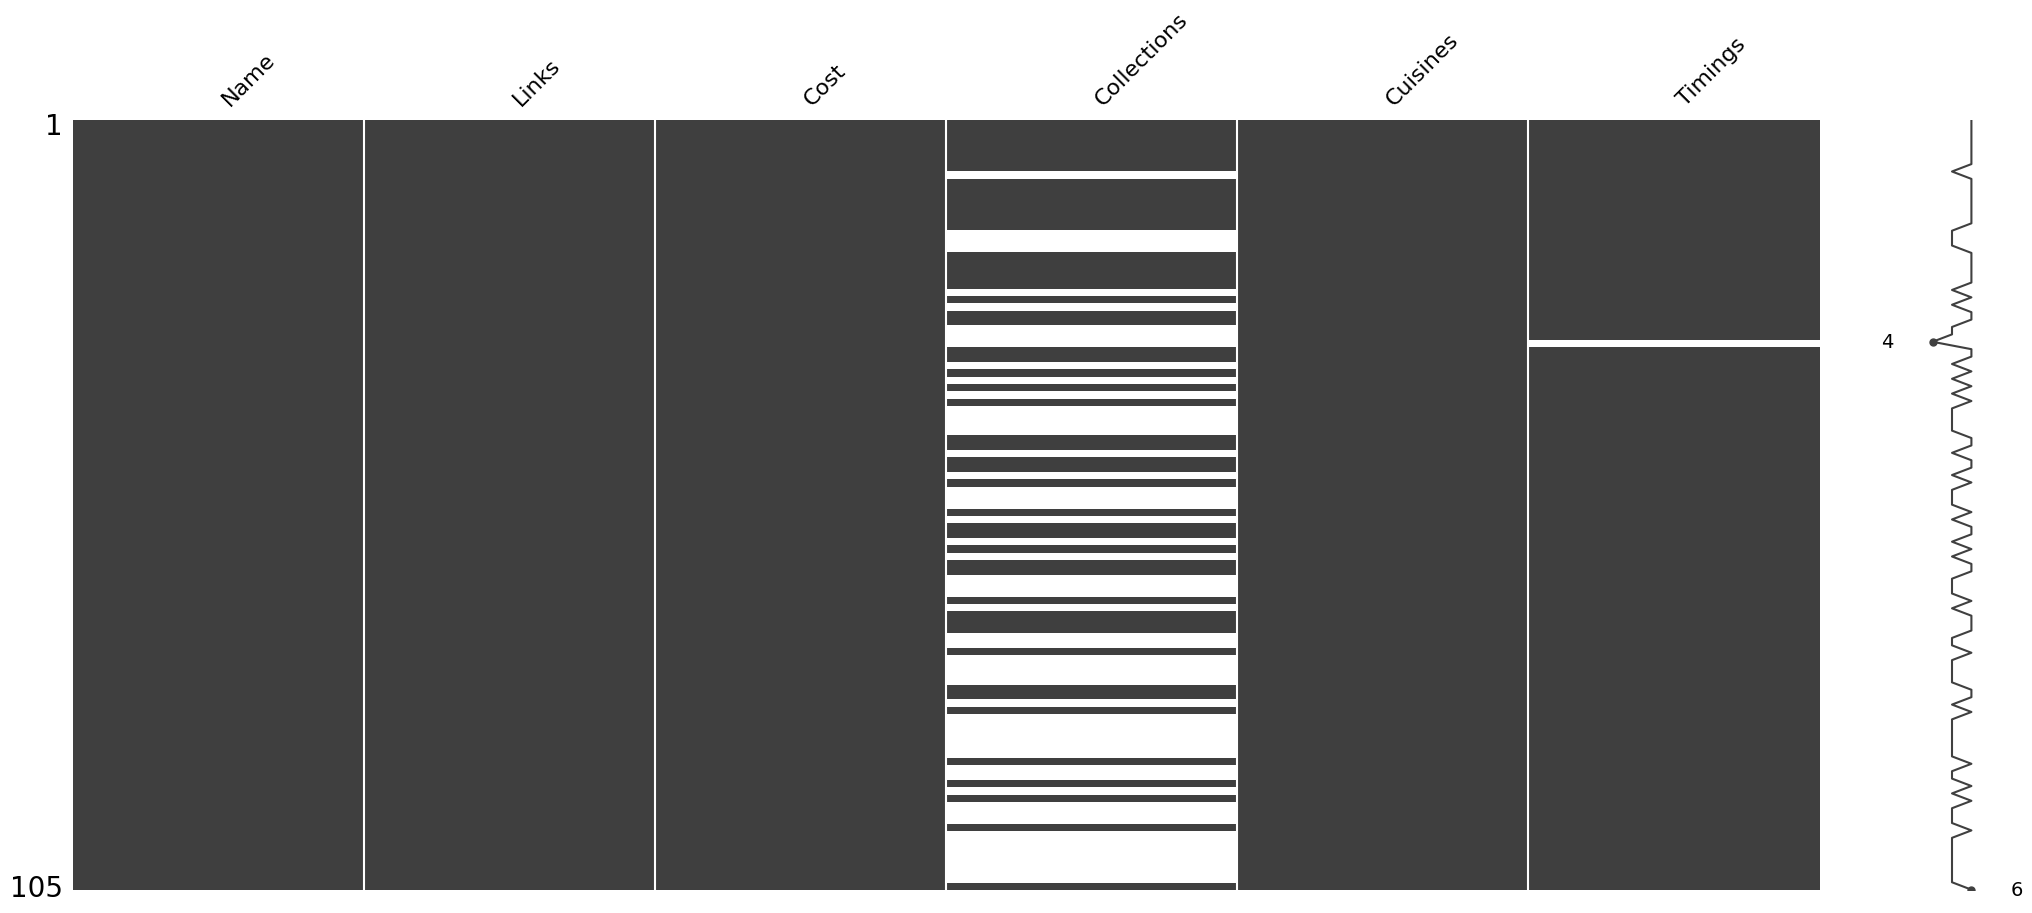

In [ ]:
# Visualizing the missing values
import missingno as msno
# visualize the null values in the DataFrame 1
msno.matrix(restaurant_df)
plt.show()

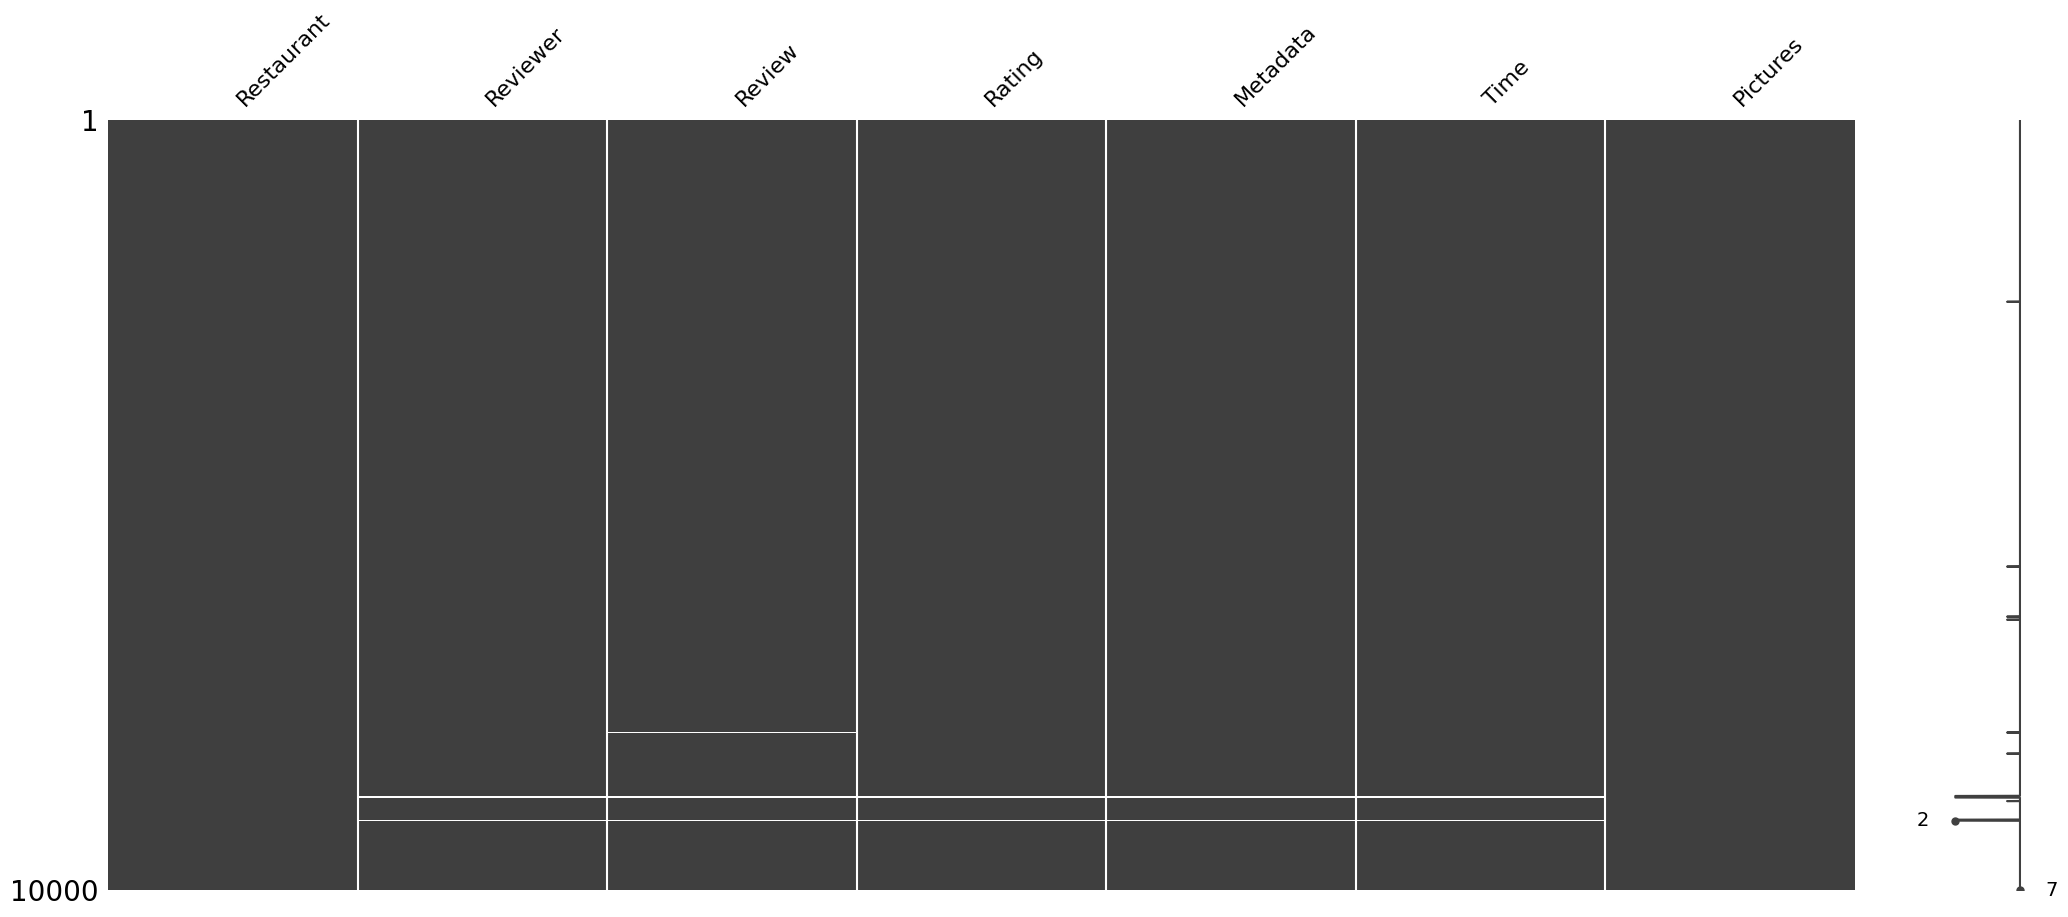

In [ ]:
# visualize the null values in the DataFrame 2
msno.matrix(reviews_df)
plt.show()

### What did you know about your dataset?

We have two datasets in our project - "Zomato Restaurant names and Metadata.csv" and "Zomato Restaurant reviews.csv".

The "Zomato Restaurant names and Metadata.csv" dataset contains six columns: "Name", "Links", "Cost", "Collections", "Cuisines", and "Timings". There are 105 non-null values in each column except for "Collections" and "Timings", which have 51 and 104 non-null values, respectively.

The "Zomato Restaurant reviews.csv" dataset contains seven columns: "Restaurant", "Reviewer", "Review", "Rating", "Metadata", "Time", and "Pictures". There are 10,000 non-null values in the "Restaurant" and "Pictures" columns, while the "Reviewer", "Review", "Rating", "Metadata", and "Time" columns have 9962 non-null values.

Overall, these datasets contain valuable information about restaurants such as their names, cuisines, cost, and customer reviews. The information can be used to perform various analysis tasks such as sentiment analysis and clustering to gain insights into customer preferences and improve restaurant services.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
restaurant_df.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [ ]:
reviews_df.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [ ]:
# Dataset Describe
restaurant_df.describe()

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [ ]:
reviews_df.describe()

,Pictures
count,10000.000000
mean,0.748600
std,2.570381
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,64.000000


### Variables Description 

**Variable Description**



---


**Restaurant Data**

---




|**Fields** | **Description**|
|-----------|--------------|
Name | Name of Restaurants
Links | URL Links of Restaurants
Cost | Per person estimated cost of dining
Collections |Tagging of Restaurants with respect to Zomato categories
Cuisines|Cuisines served by restaurants
Timings|Restaurant timings



---


**Review Data**


---


|**Fields** | **Description**|
|-----------|--------------|
Reviewer|Name of the reviewer
review|Review text
Rating|Rating provided
MetaData|Reviewer metadats-No of reviews and followers
Time|Date and Time of Review
Pictures| Number of pictures posted with review


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
restaurant_df.nunique()

Name           105
Links          105
Cost            29
Collections     42
Cuisines        92
Timings         77
dtype: int64

In [ ]:
reviews_df.nunique()

Restaurant     100
Reviewer      7446
Review        9364
Rating          10
Metadata      2477
Time          9782
Pictures        36
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

#### Data Wrangling on Zomato Restaurant Names and Metadata

In [ ]:
# Write your code to make your dataset analysis ready.
def convert_column_to_int64(df, column_name):
    """
    Convert a column in a pandas DataFrame from object to int64 data type,
    while handling values with commas as thousands separators.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the column to be converted.
    column_name (str): The name of the column to be converted.

    Returns:
    None
    """

    # Remove commas from the column values
    df[column_name] = df[column_name].str.replace(',', '')

    # Convert the column to int64 data type
    df[column_name] = df[column_name].astype('int64')

In [ ]:
# Applying Above Function in 'Cost' col of Restaurant dataset
convert_column_to_int64(restaurant_df, 'Cost')

In [ ]:
restaurant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    int64 
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: int64(1), object(5)
memory usage: 5.0+ KB


In [ ]:
# Define a function to count the number of words in a string separated by commas
def count_words(string):
    words = string.split(',')
    return len(words)

In [ ]:
# Apply the 'count_words' function to the 'Cuisines' column of the DataFrame and store the result in a new 'cuisine_count' column
restaurant_df['cuisine_count'] = restaurant_df['Cuisines'].apply(count_words)

In [ ]:
restaurant_df['cuisine_count'].value_counts()

3    33
2    26
4    21
5    12
1    12
6     1
Name: cuisine_count, dtype: int64

* 33 restaurants with 3 different cusine
* 26 restaurants with 2 different cusine
* 21 restaurants with 4 different cusine
* 12 restaurants with 5 different cusine
* 12 restaurants with only 1 cusine
* only 1 restaurant with 6 different cusine

In [ ]:
# Extract the unique values of 'Cuisines' column by splitting the strings using the comma separator
cuisines = set()
for cuisine_string in restaurant_df['Cuisines']:
    cuisine_list = cuisine_string.split(', ')
    cuisines.update(cuisine_list)
cuisines

{'American',
 'Andhra',
 'Arabian',
 'Asian',
 'BBQ',
 'Bakery',
 'Beverages',
 'Biryani',
 'Burger',
 'Cafe',
 'Chinese',
 'Continental',
 'Desserts',
 'European',
 'Fast Food',
 'Finger Food',
 'Goan',
 'Healthy Food',
 'Hyderabadi',
 'Ice Cream',
 'Indonesian',
 'Italian',
 'Japanese',
 'Juices',
 'Kebab',
 'Lebanese',
 'Malaysian',
 'Mediterranean',
 'Mexican',
 'Mithai',
 'Modern Indian',
 'Momos',
 'Mughlai',
 'North Eastern',
 'North Indian',
 'Pizza',
 'Salad',
 'Seafood',
 'South Indian',
 'Spanish',
 'Street Food',
 'Sushi',
 'Thai',
 'Wraps'}

In [ ]:
len(cuisines)

44

There are 44 different Cuisines present in our dataset.

In [ ]:
# Finding no of restaurnts by latest cuisines
cuisine_list = restaurant_df['Cuisines'].str.split(', ')

# storing all the cusines in cuisine_dict 
cuisine_dict = {}

for cuisine_names in cuisine_list:
    for cuisine in cuisine_names:
        if cuisine in cuisine_dict:
            cuisine_dict[cuisine] += 1
        else:  
            cuisine_dict[cuisine] = 1 

In [ ]:
# convert it to dataframe and getting all Cuisine by transposing the rows in dictionary to columns
cuisine_df = pd.DataFrame.from_dict([cuisine_dict]).transpose().reset_index().rename(columns={'index':'Cuisine', 0:'Number of Restaurants'}).sort_values('Number of Restaurants', ascending=False)
cuisine_df

,Cuisine,Number of Restaurants
5,North Indian,61
0,Chinese,43
1,Continental,21
6,Biryani,16
18,Fast Food,15
7,Asian,15
20,Italian,14
9,Desserts,13
4,South Indian,9
29,Bakery,7


From the above dataframe, we can see that North Indian is the mostly available food on 61 number of different restaurants followed by Chinese and Continental food which is available on 43 and 21 restaurants. It means mostly people demands for this food as compared to other food like pizza, juices, malaysian food which is available on less number of restaurant.

In [ ]:
# Restaurant with maximum number of cuisine
pd.set_option('display.max_colwidth', None)

topRestarant = restaurant_df.loc[restaurant_df.groupby('Name')['cuisine_count'].idxmax()]
topRestarant_sorted = topRestarant.sort_values(by=['cuisine_count'], ascending=False)[:20]
topRestarant_sorted[['Name','cuisine_count','Cuisines']]

,Name,cuisine_count,Cuisines
0,Beyond Flavours,6,"Chinese, Continental, Kebab, European, South Indian, North Indian"
3,Shah Ghouse Hotel & Restaurant,5,"Biryani, North Indian, Chinese, Seafood, Beverages"
70,Urban Asia - Kitchen & Bar,5,"Asian, Thai, Chinese, Sushi, Momos"
21,Jonathan's Kitchen - Holiday Inn Express & Suites,5,"North Indian, Japanese, Italian, Salad, Sushi"
92,Collage - Hyatt Hyderabad Gachibowli,5,"Continental, Italian, North Indian, Chinese, Asian"
82,Al Saba Restaurant,5,"North Indian, Chinese, Seafood, Biryani, Hyderabadi"
8,Hyper Local,5,"American, Chinese, North Indian, Kebab, South Indian"
26,Mustang Terrace Lounge,5,"Mexican, Italian, North Indian, Chinese, Salad"
31,Pista House,5,"Bakery, North Indian, Mughlai, Juices, Chinese"
4,Over The Moon Brew Company,5,"Asian, Continental, North Indian, Chinese, Mediterranean"


* Beyond Flavours restaurant has a maximum number of different type of cuisine followed by Shah Ghouse Hotel & Restaurant.
* Republic Of Noodles - Lemon Tree Hotel has 4 types of cuisine available.

In [ ]:
# Number of Indian Restaurants with Indian cuisine
indian_restaurant = restaurant_df[restaurant_df['Cuisines'].str.contains('Indian')]
indian_restaurant.shape[0]

63

In [ ]:
# Number of Chinese Restaurants with Chinese cuisine
Chinese_restaurant = restaurant_df[restaurant_df['Cuisines'].str.contains('Chinese')]
Chinese_restaurant.shape[0]

43

* There are 63 Restaurants where Indian cuisine is available
* There are 43 Restaurants where Chinese cuisine is available


In [ ]:
pd.set_option('display.max_rows', None)

# Group the DataFrame by Cuisine and sum the total cost for each group
total_cost_by_cuisine = restaurant_df.groupby('Cuisines')['Cost'].sum()
total_cost_by_cuisine.sort_values(ascending=False)

Cuisines
North Indian, Chinese, Continental                                   3300
Continental, Italian, North Indian, Chinese, Asian                   2800
Continental                                                          2600
Modern Indian, Asian, Continental, Italian                           2500
North Indian, Chinese                                                2050
North Indian, Japanese, Italian, Salad, Sushi                        1900
North Indian, Italian, Continental, Asian                            1800
Asian, Sushi                                                         1750
Thai, Asian, Chinese, Malaysian                                      1700
Italian, North Indian, South Indian, Asian                           1700
Mediterranean, North Indian, Kebab, BBQ                              1600
American                                                             1600
North Indian, Chinese, Japanese, Sushi                               1500
European, Mediterranean, Nort

In [ ]:
# Top 20 most expensive restaurants where average per person estimated cost of dining is high
top_20_expensive_restaurants = restaurant_df.sort_values('Cost', ascending=False).head(20)
top_20_expensive_restaurants[['Name','Cost']]

,Name,Cost
92,Collage - Hyatt Hyderabad Gachibowli,2800
56,Feast - Sheraton Hyderabad Hotel,2500
21,Jonathan's Kitchen - Holiday Inn Express & Suites,1900
18,10 Downing Street,1900
91,Cascade - Radisson Hyderabad Hitec City,1800
97,Zega - Sheraton Hyderabad Hotel,1750
104,Republic Of Noodles - Lemon Tree Hotel,1700
34,Mazzo - Marriott Executive Apartments,1700
90,Arena Eleven,1600
11,Barbeque Nation,1600


Collage - Hyatt Hyderabad Gachibowli and Feast - Sheraton Hyderabad Hotel are the two most expensive restaurants with the cost of 2800 and 2500 ruppees which is a average per person estimated cost of dining.

In [ ]:
# Top 20 most affordable restaurants where average per person estimated cost of dining is low
top_20_affordable_restaurants = restaurant_df.sort_values('Cost').head(20)
top_20_affordable_restaurants[['Name','Cost']]

,Name,Cost
89,Mohammedia Shawarma,150
23,Amul,150
54,Asian Meal Box,200
101,Sweet Basket,200
59,KS Bakers,200
85,Momos Delight,200
29,Hunger Maggi Point,200
103,Wich Please,250
7,Shah Ghouse Spl Shawarma,300
58,Tempteys,350


Mohammedia Shawarma, Amul and Asian Meal Box Hotel are the most affordable Restaurants where the cost of 150 and 200 ruppees which is a average per person estimated cost of dining.

#### Data Wrangling on Zomato Restaurant Reviews Dataset

In [ ]:
# convert the 'Time' column from object to datetime data type
reviews_df['Time'] = pd.to_datetime(reviews_df['Time'], format='%m/%d/%Y %H:%M')
reviews_df['Time'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Time
Non-Null Count  Dtype         
--------------  -----         
9962 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 78.2 KB


In [ ]:
# Total count of ratings from 1 star to 5 star
ratings_df = reviews_df['Rating'].value_counts().reset_index()
ratings_df.rename(columns={'index': 'Ratings(1-5)'}, inplace=True)
ratings_df.rename(columns={'Rating': 'Count'}, inplace=True)
ratings_df

,Ratings(1-5),Count
0,5,3832
1,4,2373
2,1,1735
3,3,1193
4,2,684
5,4.5,69
6,3.5,47
7,2.5,19
8,1.5,9
9,Like,1


In [ ]:
# drop the rows where 'Rating' is not equal to 'Like'
reviews_df = reviews_df[reviews_df['Rating'] != 'Like']

In [ ]:
reviews_df['Rating'] = reviews_df['Rating'].astype('float')

* 5 star is the ratings given by 3832 number of customer.
* Lowest rating given by the customers is 1.5 star.

In [ ]:
# rename the 'Reviewer' column to 'Customer_Name'
reviews_df = reviews_df.rename(columns={'Reviewer': 'Customer_Name'})

In [ ]:
reviews_df.head()

,Restaurant,Customer_Name,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.",5.0,"1 Review , 2 Followers",2019-05-25 15:54:00,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service,5.0,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx for the service by Pradeep and Subroto. My personal recommendation is Penne Alfredo Pasta:) ....... Also the music in the background is amazing.,5.0,"2 Reviews , 3 Followers",2019-05-24 22:54:00,0
3,Beyond Flavours,Swapnil Sarkar,"Soumen das and Arun was a great guy. Only because of their behavior and sincerety, And good food off course, I would like to visit this place again.",5.0,"1 Review , 1 Follower",2019-05-24 22:11:00,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and basket mutton biryani. All are good. Thanks to Pradeep. He served well. We enjoyed here. Ambience is also very good.,5.0,"3 Reviews , 2 Followers",2019-05-24 21:37:00,0


In [ ]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Restaurant     9999 non-null   object        
 1   Customer_Name  9961 non-null   object        
 2   Review         9954 non-null   object        
 3   Rating         9961 non-null   float64       
 4   Metadata       9961 non-null   object        
 5   Time           9961 non-null   datetime64[ns]
 6   Pictures       9999 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 624.9+ KB


In [ ]:
# Total number of customers
reviewers = reviews_df['Customer_Name'].value_counts().reset_index()
reviewers.rename(columns={'index': 'Customer Name'}, inplace=True)
reviewers.rename(columns={'Customer_Name': 'Count'}, inplace=True)
reviewers[:20]

,Customer Name,Count
0,Ankita,13
1,Parijat Ray,13
2,Kiran,12
3,Jay Mehta,11
4,Vedant Killa,11
5,Sravani,10
6,Siva Kumar,10
7,Priyanka,10
8,Age Of Foodies (Suraj Karambe),10
9,Manojkumar D Nambisan,10


In [ ]:
# extract Review_count and Followers from Metadata
reviews_df['Review_count'] = reviews_df['Metadata'].str.extract('(\d+) Review')
reviews_df['Followers'] = reviews_df['Metadata'].str.extract('(\d+) Follower')

In [ ]:
# fill missing values with 0 in 'Review_count' column and 'Followers' column
reviews_df['Review_count'] = pd.to_numeric(reviews_df['Review_count']).fillna(0).astype(int)
reviews_df['Followers'] = pd.to_numeric(reviews_df['Followers']).fillna(0).astype(int)

In [ ]:
# Dropping unnecessary column as it is not needed now
reviews_df = reviews_df.drop(columns=['Metadata'])
reviews_df.isnull().sum()

Restaurant        0
Customer_Name    38
Review           45
Rating           38
Time             38
Pictures          0
Review_count      0
Followers         0
dtype: int64

In [ ]:
# Top 20 Popular customers (With Highest number of followers) and their order timings
popular_customers = reviews_df.loc[reviews_df.groupby('Customer_Name')['Followers'].idxmax()]
popular_customers_sorted = popular_customers.sort_values(by=['Followers'], ascending=False)[:20]
popular_customers_sorted[['Customer_Name','Followers', 'Restaurant','Time']]

,Customer_Name,Followers,Restaurant,Time
3927,Satwinder Singh,13410,Deli 9 Bistro,2019-02-10 12:46:00
8719,Eat_vth_me,13320,American Wild Wings,2019-05-13 15:32:00
3147,Samar Sardar,11329,Pista House,2018-10-12 20:21:00
7884,Foodies Hyderabad,9494,Khaan Saab,2019-02-01 18:04:00
1177,Srinivas,7628,Barbeque Nation,2018-07-14 13:10:00
1071,Aman Arora,7589,Sardarji's Chaats & More,2018-10-31 22:33:00
635,ASH&B2,6931,eat.fit,2019-04-07 22:27:00
5581,Hasanthi Mula,5879,Cafe Eclat,2018-06-10 14:05:00
9701,#FOODPORN,5873,Zega - Sheraton Hyderabad Hotel,2019-05-15 16:35:00
4820,FooD HUNTer,5715,Udipi's Upahar,2018-10-01 09:28:00


In [ ]:
# Top 20 Popular customers (With Highest number of Review_count)
popular_customersR = reviews_df.loc[reviews_df.groupby('Customer_Name')['Review_count'].idxmax()]
popular_customersR_sorted = popular_customersR.sort_values(by=['Review_count'], ascending=False)[:20]
popular_customersR_sorted[['Customer_Name','Review_count']]

,Customer_Name,Review_count
3124,Anvesh Chowdary,1031
4512,ᴀɴ.ᴏᴛʜᴇʀ.sᴇɴ,685
7638,Abc098,665
6627,Mithun Ravindranathan,560
9653,Mohd Zubair Ali (Hyderabad.Food.Diaries),482
9999,Bhargava Krishna,472
5889,Epicurean Tales,452
755,Raghu,443
9179,Aarti Kamath,417
9181,Shrishail Deshnur,414


In [ ]:
# Top 20 Popular Restaurant (With Highest number of Review_count)
popular_restaurant = reviews_df.loc[reviews_df.groupby('Restaurant')['Review_count'].idxmax()]
popular_restaurant_sorted = popular_restaurant.sort_values(by=['Review_count'], ascending=False)[:20]
popular_restaurant_sorted[['Restaurant','Review_count']]

,Restaurant,Review_count
9208,Collage - Hyatt Hyderabad Gachibowli,1031
3124,Pista House,1031
7297,Labonel,1031
4512,Owm Nom Nom,685
7638,The Old Madras Baking Company,665
6627,Aromas@11SIX,560
9653,Hyderabadi Daawat,482
9999,Chinese Pavilion,472
5889,Tempteys,452
9168,Cascade - Radisson Hyderabad Hitec City,452


In [ ]:
# Top 20 Popular Restaurant (With Highest number of followers)
popular_restaurant_by_followers = reviews_df.loc[reviews_df.groupby('Restaurant')['Followers'].idxmax()]
popular_restaurant_by_followers_sorted = popular_restaurant_by_followers.sort_values(by=['Followers'], ascending=False)[:20]
popular_restaurant_by_followers_sorted[['Restaurant','Followers']]

,Restaurant,Followers
6592,Komatose - Holiday Inn Express & Suites,13410
3927,Deli 9 Bistro,13410
6876,The Tilt Bar Republic,13410
8719,American Wild Wings,13320
5160,Hitech Bawarchi Food Zone,11329
3147,Pista House,11329
8027,Tandoori Food Works,9494
9659,Hyderabadi Daawat,9494
9518,Desi Bytes,9494
7884,Khaan Saab,9494


In [ ]:
# Peak hours for orders
def get_number_of_orders(a,b):
  A = (reviews_df['Time'].dt.hour >= a) & (reviews_df['Time'].dt.hour < b)
  peak_A = reviews_df[A]
  row_count = peak_A.shape[0]
  print(f'Number of Orders on Zomato between {a} and {b} is :{row_count}')

In [ ]:
atime=list(np.arange(25))
btime=list(np.arange(1,25))
for a,b in zip(atime,btime):
  d = get_number_of_orders(a,b)

Number of Orders on Zomato between 0 and 1 is :509
Number of Orders on Zomato between 1 and 2 is :313
Number of Orders on Zomato between 2 and 3 is :167
Number of Orders on Zomato between 3 and 4 is :102
Number of Orders on Zomato between 4 and 5 is :55
Number of Orders on Zomato between 5 and 6 is :39
Number of Orders on Zomato between 6 and 7 is :44
Number of Orders on Zomato between 7 and 8 is :78
Number of Orders on Zomato between 8 and 9 is :134
Number of Orders on Zomato between 9 and 10 is :171
Number of Orders on Zomato between 10 and 11 is :229
Number of Orders on Zomato between 11 and 12 is :308
Number of Orders on Zomato between 12 and 13 is :459
Number of Orders on Zomato between 13 and 14 is :580
Number of Orders on Zomato between 14 and 15 is :776
Number of Orders on Zomato between 15 and 16 is :645
Number of Orders on Zomato between 16 and 17 is :549
Number of Orders on Zomato between 17 and 18 is :480
Number of Orders on Zomato between 18 and 19 is :438
Number of Orders

In [ ]:
# Lets find Peak hours which is between 8 pm to 12 am
get_number_of_orders(20,24)

Number of Orders on Zomato between 20 and 24 is :3363


In [ ]:
# Lets find Off hours which is between 4 am to 8 am
get_number_of_orders(4,8)

Number of Orders on Zomato between 4 and 8 is :216


In [ ]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Restaurant     9999 non-null   object        
 1   Customer_Name  9961 non-null   object        
 2   Review         9954 non-null   object        
 3   Rating         9961 non-null   float64       
 4   Time           9961 non-null   datetime64[ns]
 5   Pictures       9999 non-null   int64         
 6   Review_count   9999 non-null   int64         
 7   Followers      9999 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 961.1+ KB


In [ ]:
hourly_counts = reviews_df['Time'].dt.hour.value_counts()
# find the busiest Hour
busiest_hour = hourly_counts.idxmax()
print(f'busiest_hour: {busiest_hour}')
print("The number of Orders in that hour is:", hourly_counts[busiest_hour])

busiest_hour: 22.0
The number of Orders in that hour is: 968


In [ ]:
# count the number of orders for each date
daily_counts = reviews_df['Time'].dt.date.value_counts()

# find the busiest day
busiest_day = daily_counts.idxmax()

# print the results
print("The busiest day for Zomato is:", busiest_day)
print("The number of Orders on that day is:", daily_counts[busiest_day])


The busiest day for Zomato is: 2018-07-29
The number of Orders on that day is: 97


* The Busiest day for Zomato is **29th July 2018**
* The number of Orders on that day is **97**

In [ ]:
# calculate the first and last values
first_time = reviews_df['Time'].min()
last_time = reviews_df['Time'].max()

In [ ]:
# Getting date and time of the first and last order placed by customer
print(f"The first order is placed in Zomato on: {first_time}")
print(f"The last order is placed in Zomato on: {last_time}")

The first order is placed in Zomato on: 2016-05-31 16:41:00
The last order is placed in Zomato on: 2019-05-25 20:23:00


In [ ]:
last_time - first_time

Timedelta('1089 days 03:42:00')

Our overall dataset containing data of 1089 Days Three Hours and 42 Minutes

In [ ]:
reviews_df.shape

(9999, 8)

In [ ]:
Firsto = reviews_df.loc[reviews_df.groupby('Customer_Name')['Time'].idxmax()]
Firsto.shape

(7446, 8)

In [ ]:
len(set(reviews_df['Customer_Name']))

7447

There are 7447 Different Customer Who have ordered food From Zomato in this Dataset 

In [ ]:
from collections import Counter
# count the occurrences of each name
name_counts = Counter(reviews_df['Customer_Name'])
# filter out the names that occur only once
once = [name for name, count in name_counts.items() if count == 1]
len(once)

6105

6105 Customers Ordered any food items only once on Zomato

In [ ]:
# filter out the names that occur only once
repeat = [name for name, count in name_counts.items() if count > 1]
len(repeat)

1342

1342 Are repeat Customers on Zomato

In [ ]:
mvp = [name for name, count in name_counts.items() if count > 10]
len(mvp)
mvp

['Kiran', 'Ankita', 'Parijat Ray', 'Vedant Killa', 'Jay Mehta', nan]

These are Most valuable Customers who have ordered Food From Zomato more than 10 times

In [ ]:
# Top Customers Who have posted most pictures on Zomato
social_customer = reviews_df.loc[reviews_df.groupby('Customer_Name')['Pictures'].idxmax()]
social_customer_sorted = social_customer.sort_values(by=['Pictures'], ascending=False)[:20]
social_customer_sorted[['Customer_Name','Pictures']]

,Customer_Name,Pictures
9043,Anvith Devulapally,64
3148,Food Nawabs,52
6080,Akshith,42
6066,Hydfoodiesisters,37
9222,Vijaya,34
7375,ChicLifeByte,34
9621,BeingHydFoodie,32
9683,Hyderabadfoodexplorer (sanchay Gumidelli),28
6069,Vamshi Puli,28
9042,Vasanthi Singampalli,27


These are top social customers who have posted most number of pictures on Zomato

#### Merging restaurant_df and reviews_df together

In [ ]:
restaurant_df.rename({'Name':'Restaurant_name', 'Timings':'Restaurant_timings'},axis=1, inplace=True )
restaurant_df.head(2)

,Restaurant_name,Links,Cost,Collections,Cuisines,Restaurant_timings,cuisine_count
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavours-gachibowli,800,"Food Hygiene Rated Restaurants in Hyderabad, Corporate Favorites, Great Buffets, Top-Rated, Gold Curated, Live Sports Screenings","Chinese, Continental, Kebab, European, South Indian, North Indian","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",6
1,Paradise,https://www.zomato.com/hyderabad/paradise-gachibowli,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM,3


In [ ]:
reviews_df.rename({'Restaurant':'Restaurant_name', 'Time':'Review_timing'}, axis=1, inplace=True)
reviews_df.head(2)

,Restaurant_name,Customer_Name,Review,Rating,Review_timing,Pictures,Review_count,Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.",5.0,2019-05-25 15:54:00,0,1,2
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service,5.0,2019-05-25 14:20:00,0,3,2


In [ ]:
# merging both the data together on Restaurant_name column
zomato_data = pd.merge(restaurant_df, reviews_df.drop_duplicates(), on = 'Restaurant_name', how='left')
zomato_data.shape

(9968, 14)

In [ ]:
zomato_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9968 entries, 0 to 9967
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Restaurant_name     9968 non-null   object        
 1   Links               9968 non-null   object        
 2   Cost                9968 non-null   int64         
 3   Collections         4965 non-null   object        
 4   Cuisines            9968 non-null   object        
 5   Restaurant_timings  9868 non-null   object        
 6   cuisine_count       9968 non-null   int64         
 7   Customer_Name       9961 non-null   object        
 8   Review              9954 non-null   object        
 9   Rating              9961 non-null   float64       
 10  Review_timing       9961 non-null   datetime64[ns]
 11  Pictures            9963 non-null   float64       
 12  Review_count        9963 non-null   float64       
 13  Followers           9963 non-null   float64     

### What all manipulations have you done and insights you found?

* There are 105 different restaurant data in restaurant CSV
* 10000 Data points in reviews csv

* 5 Rating by 3832 Number of People
* 4 Rating by 2373 Number of People
* 1 Rating by 1735 Number of People
* 3 Rating by 1193 Number of People
* 2 Rating by 684  Number of People

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Dist Plot and Hist Plot on Numerical Features (Univariate)

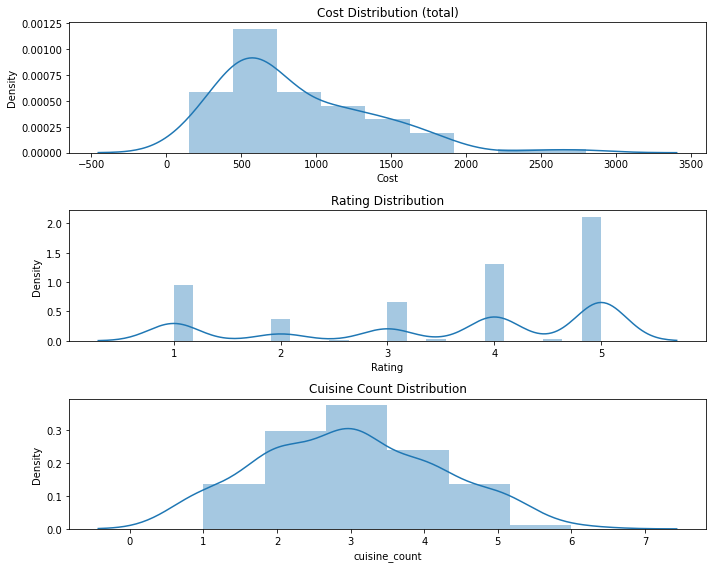

In [ ]:
# Chart - 1 visualization code
# GRAPH -1
# Dist Plot of some important numerical feature 

fig, ax= plt.subplots(3,1, figsize=(10,8))

ax[0].set_title("Cost Distribution (total)")
sns.distplot(restaurant_df['Cost'], kde=True, ax=ax[0])

ax[1].set_title("Rating Distribution")
sns.distplot(reviews_df['Rating'], kde=True, ax=ax[1])

ax[2].set_title("Cuisine Count Distribution")
sns.distplot(restaurant_df['cuisine_count'], kde=True, ax=ax[2])

fig.tight_layout()
fig.show()
plt.show()

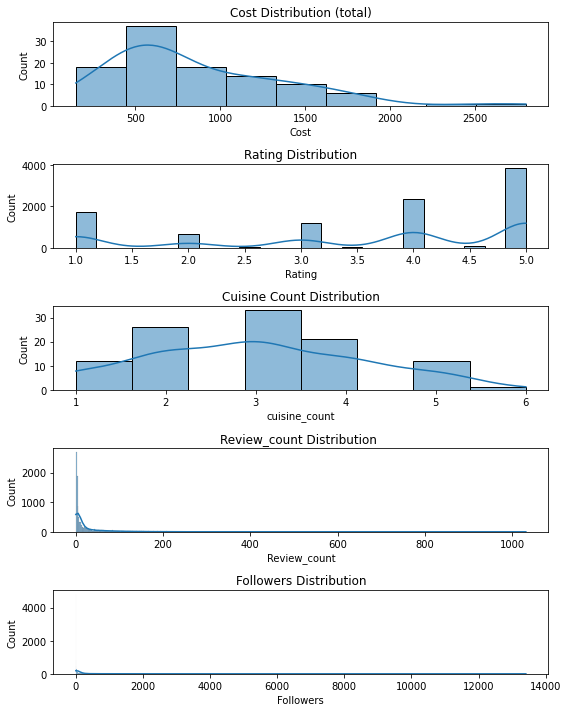

In [ ]:
# GRAPH - 2
# Hist Plot of some important numerical feature 
# To see the distributions and skewness of the numerical feature

fig, ax= plt.subplots(5,1, figsize=(8,10))

ax[0].set_title("Cost Distribution (total)")
sns.histplot(restaurant_df['Cost'], kde=True, ax=ax[0])

ax[1].set_title("Rating Distribution")
sns.histplot(reviews_df['Rating'], kde=True, ax=ax[1])

ax[2].set_title("Cuisine Count Distribution")
sns.histplot(restaurant_df['cuisine_count'], kde=True, ax=ax[2])

ax[3].set_title("Review_count Distribution ")
sns.histplot(reviews_df['Review_count'], kde=True, ax=ax[3])

ax[4].set_title("Followers Distribution")
sns.histplot(reviews_df['Followers'], kde=True, ax=ax[4])

fig.tight_layout()
fig.show()
plt.show()

##### 1. Why did you pick the specific chart?

**Dist Plot** is known as distribution plot which depicts the variations in data that is it will show the variations in distribution of observations. It also displays a combination of statistical representations of numerical data, such as histogram, kde, bars etc. Distplot is helpful in understanding the distribution of the feature.

**Hist Plot** is a graphical representation of data that organizes the data into bins, and shows how frequently each bin occurs. It is used to illustrate the distribution of data, as well as its skewness.



##### 2. What is/are the insight(s) found from the chart?

Insights:
* Cost column shows skewness.
* Maximum restaurant has a price range of 500 rupee.
* Most of the restaurants got 5 star ratings.
* Most of the restaurants has 3 types of cuisines.
* Most of customers posts 1 or 2 pictures with their reviews.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Cost is the important factor for any business. But from this visualisation, we are not getting any insights. we will do further analysis.

#### Chart - 2 Pie Plot on Ratings Features (Univariate)

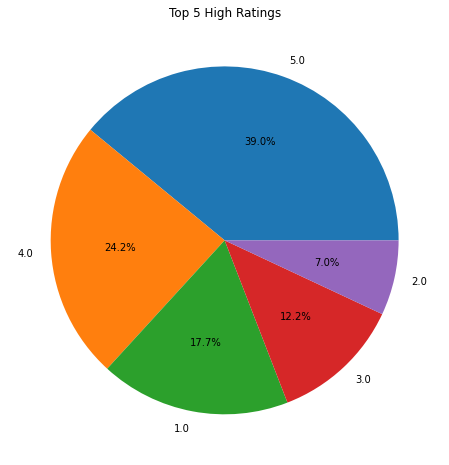

In [ ]:
# Chart - 2 visualization code
# Pie Plot of Total count of ratings from 1 star to 5 star

# ratings_df = reviews_df['Rating'].value_counts().reset_index()
# ratings_df.rename(columns={'index': 'Ratings(1-5)'}, inplace=True)
# ratings_df.rename(columns={'Rating': 'Count'}, inplace=True)
# ratings_df

plt.figure(figsize=(15,8))
x_label = reviews_df['Rating'].value_counts().index
y_label = reviews_df['Rating'].value_counts().values
plt.pie(x = y_label[:5], labels = x_label[:5], autopct='%1.1f%%')
plt.title('Top 5 High Ratings', color= 'black')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3 Wordclouds on Reviews and Ratings Feature (Univariate)

In [ ]:
# Chart - 3 visualization code
# Removing stop words and also most common words used by restaurants
stop_words = stopwords.words('english')
print(stop_words)

# common word used in restaurants
common_word = ['place', 'good','one','food','ordered','taste','well','order','restaurant','also']
common_word


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

['place',
 'good',
 'one',
 'food',
 'ordered',
 'taste',
 'well',
 'order',
 'restaurant',
 'also']

In [ ]:
import re
reviews_df['Review'] = reviews_df['Review'].map(lambda x: re.sub('[,\.!?]',     #Search for all non-letters   
                                                                '',             # Replace all non-letters with spaces
                                                                str(x)))        # Column and row to search
reviews_df['Review'] = reviews_df['Review'].map(lambda x: x.lower())
reviews_df['Review'] = reviews_df['Review'].map(lambda x: x.split())
reviews_df['Review'] = reviews_df['Review'].apply(lambda x: [item for item in x if item not in stop_words])
reviews_df['Review'] = reviews_df['Review'].apply(lambda x: [item for item in x if item not in common_word])

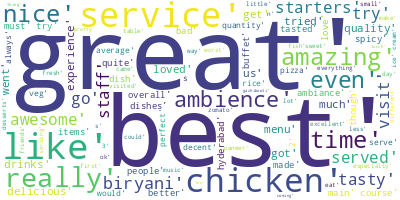

In [ ]:
# Wordcloud for review column
reviews_df['Review'] = reviews_df['Review'].astype(str)

ps = PorterStemmer() 
reviews_df['Review']=reviews_df['Review'].map(lambda x: ps.stem(x))
long_string = ','.join(list(reviews_df['Review'].values))
long_string
wordcloud = WordCloud(background_color="white", max_words=100, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [ ]:
# Extracting positive and negetive reviews 
reviews_df['Rating'] = pd.to_numeric(reviews_df['Rating'],errors='coerce')

# Positive review is where ratings is greater than & equal to 3 star
pos_reviews = reviews_df[reviews_df.Rating>= 3]

# Negetive review is where ratings is less than the 3 star
neg_reviews = reviews_df[reviews_df.Rating< 3]

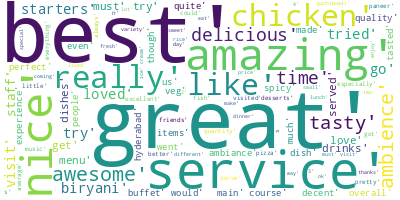

In [ ]:
# Wordcloud for Positive Reviews
long_string = ','.join(list(pos_reviews['Review'].values))
long_string

wordcloud = WordCloud(background_color="white", max_words=100, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

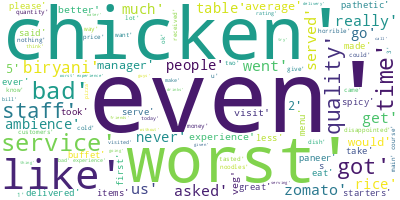

In [ ]:
# Wordcloud for Negetive Reviews
long_string = ','.join(list(neg_reviews['Review'].values))
long_string
wordcloud = WordCloud(background_color="white", max_words=100, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

##### 1. Why did you pick the specific chart?

We have used wordcloud which is a visual representation of the unstructured text as a images in which bigger is the word, more often that word is mentioned which is helpful in getting insights of trending patterns.

##### 2. What is/are the insight(s) found from the chart?

We have created two datasets equal and above 3 rating for positive reviews and below 3 for negative reviews. Apart from stopwords i have removing common words used in restuarant business.

From the above visualization, we can definately come up with some conclusion that most of the customers gave positive as well as negetive feedback using this keywords. So that we can easily examine that what exactly the behaviour and views of our customers.

Service , bad chicken , staff behavior, stale food are key reasons for negative reviews

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. The gained insights help us creating a positive buisness impact by using reviews and ratings so that restaurant with less number of ratings can work on their management.

#### Chart - 4 Bar Plot on Numerical + Categorical Features (Bivariate)

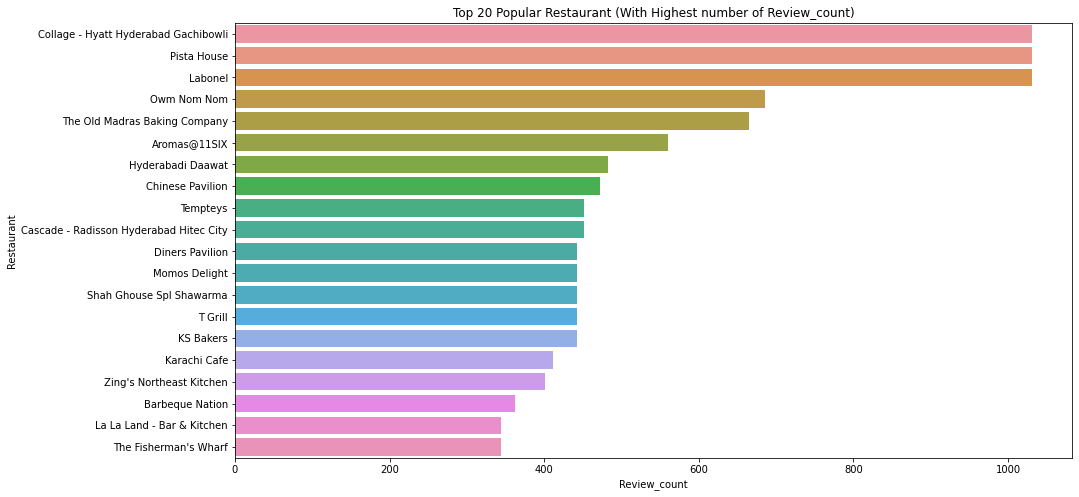

In [ ]:
# Chart - 4 visualization code
# GRAPH - 1
# Bar plot on popular restaurant(With Highest number of Review_count)
plt.figure(figsize=(15,8))
sns.barplot(data = popular_restaurant_sorted, x = 'Review_count', y = 'Restaurant')
plt.title('Top 20 Popular Restaurant (With Highest number of Review_count)')
plt.show()

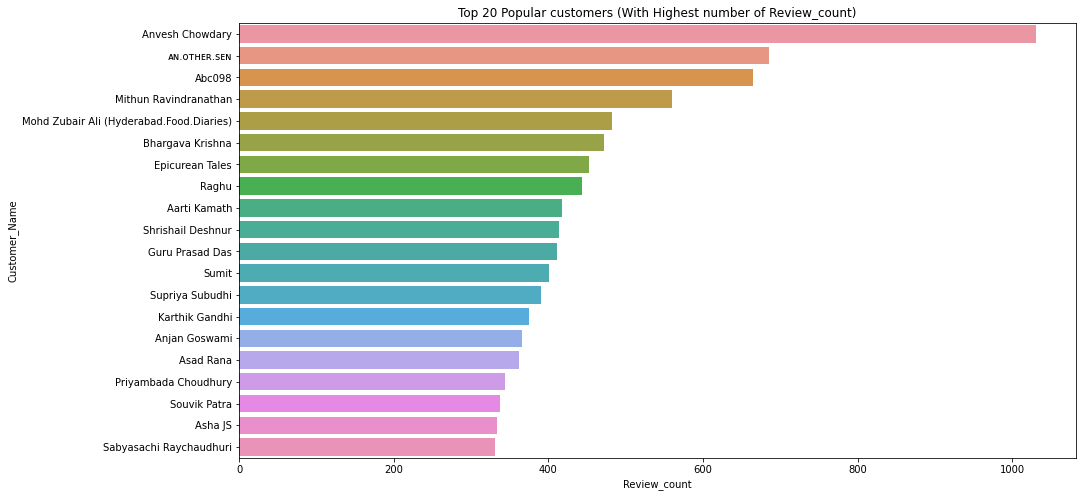

In [ ]:
# GRAPH - 2
# Bar Plot on Popular customers With Highest number of Review_count
plt.figure(figsize=(15,8))
sns.barplot(data = popular_customersR_sorted, x = 'Review_count', y = 'Customer_Name')
plt.title('Top 20 Popular customers (With Highest number of Review_count)')
plt.show()

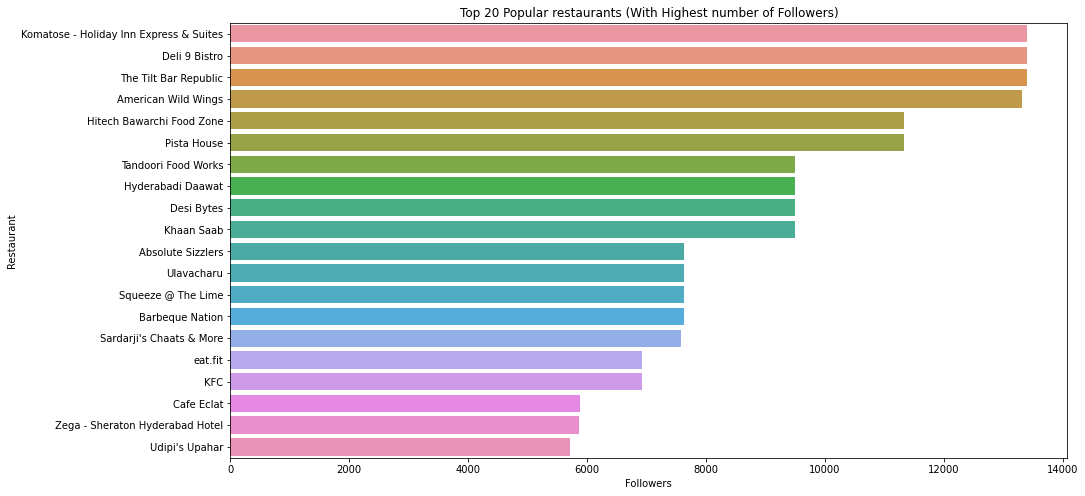

In [ ]:
# GRAPH - 3
# Bar Plot on Popular Restaurant With Highest number of followers
plt.figure(figsize=(15,8))
sns.barplot(data = popular_restaurant_by_followers_sorted, x = 'Followers', y = 'Restaurant')
plt.title('Top 20 Popular restaurants (With Highest number of Followers)')
plt.show()

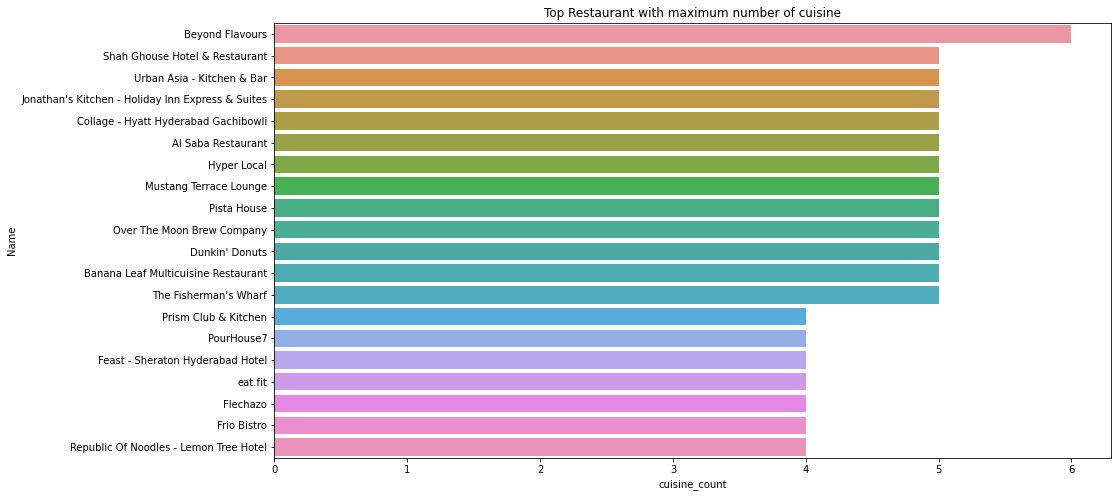

In [ ]:
# GRAPH - 4
# Bar Plot on Restaurant with maximum number of cuisine
plt.figure(figsize=(15,8))
sns.barplot(data = topRestarant_sorted, x = 'cuisine_count', y = 'Name')
plt.title('Top Restaurant with maximum number of cuisine')
plt.show()

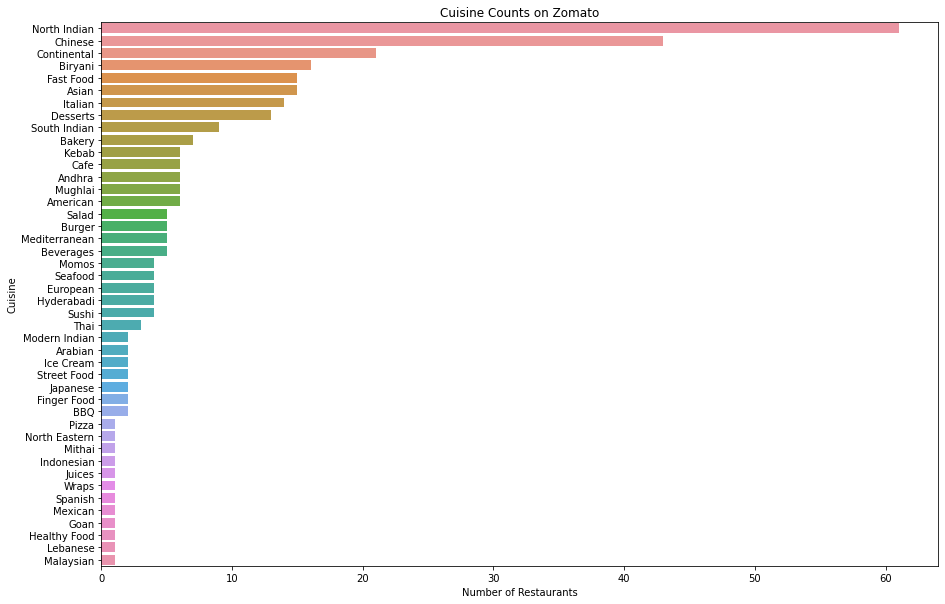

In [ ]:
# GRAPH - 5
# Bar Plot on Total cuisine count
plt.figure(figsize=(15,10))
sns.barplot(x='Number of Restaurants', y='Cuisine', data=cuisine_df)
plt.title('Cuisine Counts on Zomato')
plt.show()

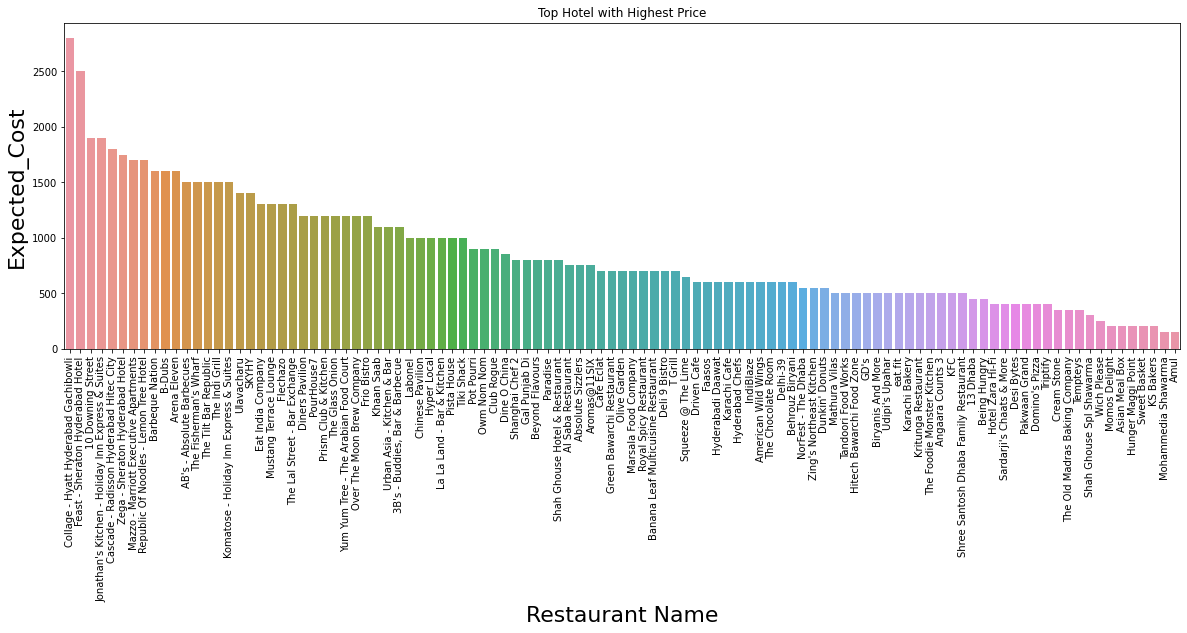

In [ ]:
# GRAPH - 6
# Extracting name and price 
hotel_cost = zomato_data.sort_values('Cost', ascending = False)[['Restaurant_name','Cost']]
# Checking Relationship of neighbourhood group and price of listings
fig = plt.figure(figsize=[20,6])
sns.barplot(x='Restaurant_name', y='Cost',data=hotel_cost)
plt.xlabel('Restaurant Name', size = 22)
plt.ylabel('Expected_Cost', size = 22)
plt.title('Top Hotel with Highest Price')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts indicates the frequency counts of values for the different levels of a categorical variable. Sometimes, bar charts exhibit different statistics, such as percentages.

##### 2. What is/are the insight(s) found from the chart?

* Collage - Hyatt Hyderabad Gachibowli, Pista House	and Labonel is the most reviewed restaurants having 1031 reviews. While La La Land - Bar & Kitchen and The Fisherman's Wharf has the lowest reviews.
* Anvesh Chowdary has posted the most number of reviews nearly 1031 reviews.
* Komatose - Holiday Inn Express & Suites, Deli 9 Bistro and The Tilt Bar Republic has highest number of followers nearly of 13410, it means we can conclude that may be this restaurants will have great performance.
* Beyond Flavour has maximum numbers of cuisines available so that customers can get any type of food which they want.
* North Indian Food is mostly available on nearly 60 number of restaurants. So we can conclude that north indian food is mostly ordered and demanded food by the customers followed by Chinese food. while malaysian, pizza etc are the less ordered and demanded cuisines.
* Collage - Hyatt Hyderabad Gachibowli is the most expensive restaurant among all the restaurants.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Since it is direct to consumer buisness, every above point is imporatant here. We found most and least reviews of the resaurant so that one can work on it. And this is how we gained positive insights.

#### Chart - 5 Line Plot on Bivariate Data (Bivariate Analysis)

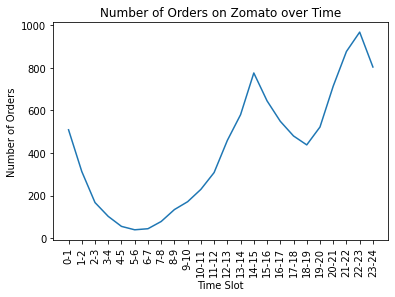

In [ ]:
# Chart - 5 visualization code
# GRAPH - 1
# create a dictionary to store the data
data = {'Time Slot': ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-24'],
        'Number of Orders': [509, 313, 167, 102, 55, 39, 44, 78, 134, 171, 229, 308, 459, 580, 776, 645, 549, 480, 438, 522, 714, 877, 968, 804]}
df = pd.DataFrame(data)

# create a line plot using seaborn
sns.lineplot(x='Time Slot', y='Number of Orders', data=df)
plt.title('Number of Orders on Zomato over Time')
plt.xticks(rotation=90)
plt.show()


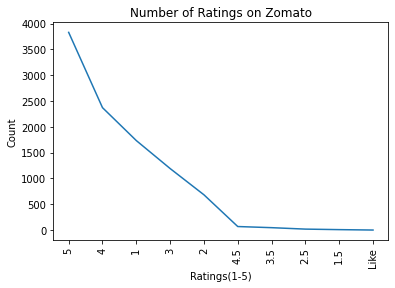

In [ ]:
# GRAPH - 2
# create a line plot on ratings
sns.lineplot(x='Ratings(1-5)', y='Count', data=ratings_df)
plt.title('Number of Ratings on Zomato')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

A line plot is a type of graph that displays data using a number of connected points or markers, connected by straight lines. It is commonly used to visualize relationships between two different variables. Line plots are useful for assessing trends and patterns in data and can be used to compare multiple sets of data.

##### 2. What is/are the insight(s) found from the chart?

Insights:
* From graph 1, we can infer that most of the people orders food between 3PM to 4PM and 10PM to 11PM. Least number of order is between 3AM to 7AM may be because of very early morning timing.
* From graph 2, we can see that 5 star rating has more number of count than 4 star. Ratings from 4.5 star to 1.5 star has least and similar number of count.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. We can see the peak hours for order on zomato app. From this perspective, we can suggest zomato to throw more offer at this timings so that zomato can increse their order number and their cutomers.

#### Chart - 6 Scatter Plot on review_length v/s ratings (Bivariate)

In [ ]:
# creating new variable review length 
zomato_data['Review'] = zomato_data['Review'].astype(str)
zomato_data['Review_length'] = zomato_data['Review'].apply(len)
zomato_data.head(2)

,Restaurant_name,Links,Cost,Collections,Cuisines,Restaurant_timings,cuisine_count,Customer_Name,Review,Rating,Review_timing,Pictures,Review_count,Followers,Review_length
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavours-gachibowli,800,"Food Hygiene Rated Restaurants in Hyderabad, Corporate Favorites, Great Buffets, Top-Rated, Gold Curated, Live Sports Screenings","Chinese, Continental, Kebab, European, South Indian, North Indian","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",6,Rusha Chakraborty,"The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.",5.0,2019-05-25 15:54:00,0.0,1.0,2.0,222
1,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavours-gachibowli,800,"Food Hygiene Rated Restaurants in Hyderabad, Corporate Favorites, Great Buffets, Top-Rated, Gold Curated, Live Sports Screenings","Chinese, Continental, Kebab, European, South Indian, North Indian","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",6,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service,5.0,2019-05-25 14:20:00,0.0,3.0,2.0,144


In [ ]:
# Chart - 6 visualization code
# Plotting Scatter plot of review_length column
import plotly.express as px
fig = px.scatter(zomato_data, x = zomato_data['Rating'], y = zomato_data['Review_length'])
fig.update_layout(title_text = "Rating vs Review Length")
fig.show()

In [ ]:
# GRAPH - 2
# creating new column named polarity for the sentiment analysis
from textblob import TextBlob
zomato_data['Polarity'] = zomato_data['Review'].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)

In [ ]:
zomato_data.head()

,Restaurant_name,Links,Cost,Collections,Cuisines,Restaurant_timings,cuisine_count,Customer_Name,Review,Rating,Review_timing,Pictures,Review_count,Followers,Review_length,Polarity
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavours-gachibowli,800,"Food Hygiene Rated Restaurants in Hyderabad, Corporate Favorites, Great Buffets, Top-Rated, Gold Curated, Live Sports Screenings","Chinese, Continental, Kebab, European, South Indian, North Indian","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",6,Rusha Chakraborty,"The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.",5.0,2019-05-25 15:54:00,0.0,1.0,2.0,222,0.660000
1,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavours-gachibowli,800,"Food Hygiene Rated Restaurants in Hyderabad, Corporate Favorites, Great Buffets, Top-Rated, Gold Curated, Live Sports Screenings","Chinese, Continental, Kebab, European, South Indian, North Indian","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",6,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service,5.0,2019-05-25 14:20:00,0.0,3.0,2.0,144,0.606667
2,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavours-gachibowli,800,"Food Hygiene Rated Restaurants in Hyderabad, Corporate Favorites, Great Buffets, Top-Rated, Gold Curated, Live Sports Screenings","Chinese, Continental, Kebab, European, South Indian, North Indian","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",6,Ashok Shekhawat,A must try.. great food great ambience. Thnx for the service by Pradeep and Subroto. My personal recommendation is Penne Alfredo Pasta:) ....... Also the music in the background is amazing.,5.0,2019-05-24 22:54:00,0.0,2.0,3.0,189,0.540000
3,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavours-gachibowli,800,"Food Hygiene Rated Restaurants in Hyderabad, Corporate Favorites, Great Buffets, Top-Rated, Gold Curated, Live Sports Screenings","Chinese, Continental, Kebab, European, South Indian, North Indian","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",6,Swapnil Sarkar,"Soumen das and Arun was a great guy. Only because of their behavior and sincerety, And good food off course, I would like to visit this place again.",5.0,2019-05-24 22:11:00,0.0,1.0,1.0,148,0.500000
4,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavours-gachibowli,800,"Food Hygiene Rated Restaurants in Hyderabad, Corporate Favorites, Great Buffets, Top-Rated, Gold Curated, Live Sports Screenings","Chinese, Continental, Kebab, European, South Indian, North Indian","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",6,Dileep,Food is good.we ordered Kodi drumsticks and basket mutton biryani. All are good. Thanks to Pradeep. He served well. We enjoyed here. Ambience is also very good.,5.0,2019-05-24 21:37:00,0.0,3.0,2.0,160,0.577500


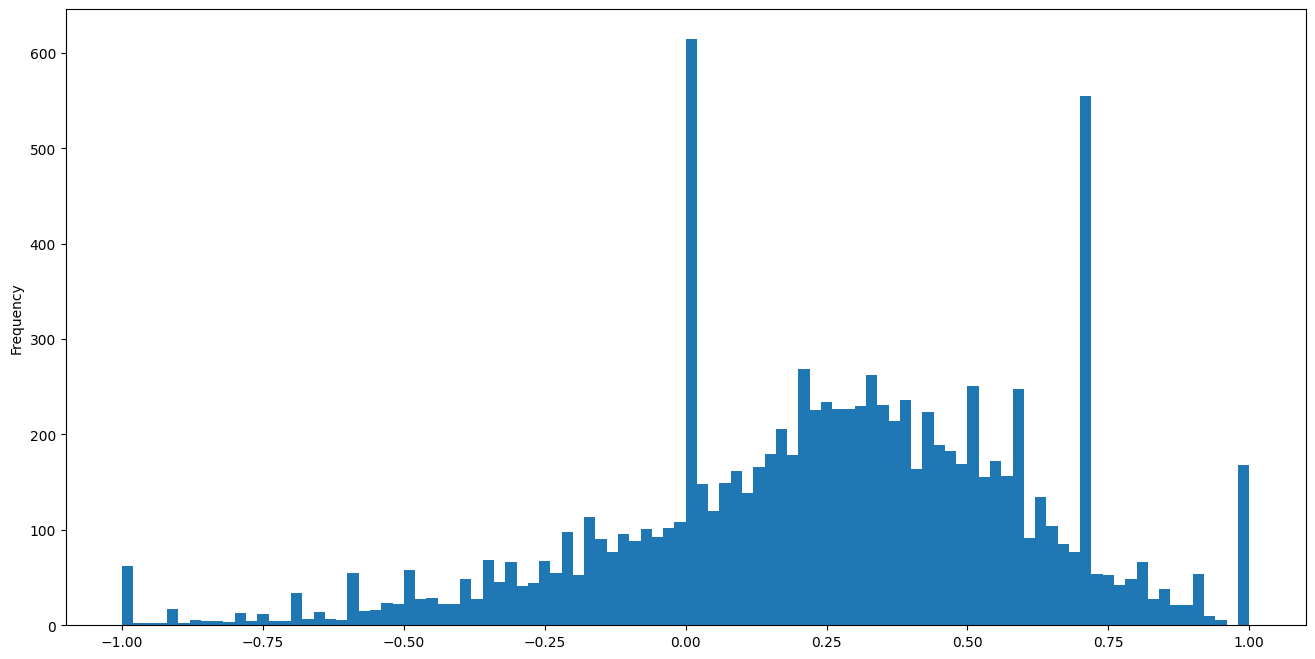

In [ ]:
# Plotting the graph for polarity of positive, negetive and neutral reviews
plt.figure(figsize=(16,8))
zomato_data['Polarity'].plot(kind='hist', bins=100)
plt.show()

##### 1. Why did you pick the specific chart?

**Scatter plot** is dotted representation of the two variables in a datasets which uses a coordinate axes to plot the points. A Scatter (XY) Plot has points that show the relationship between two sets of data.

**TextBlob** is a Python library for processing textual data. It provides a simple API for divding into common natural language processing tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.



##### 2. What is/are the insight(s) found from the chart?

Insights:
* From Graph 1, it shows us that length of review doesn't impact ratings of the restaurants.
* Ploarity analyzes the text ranges and search for words that express sentiments such as good or bad assignes a score to text in following manner: emotional negative (-2), rational negative (-1), neutral (0), rational positive (+1), and emotional positive (+2). In practice, neutral often means no opinion or sentiment expressed. The above graph 2 shows us the majority of reviews are nuetral 0, probably suggesting mixture of bad and good words in reviews.
* Also the number of positive reviews (greater than 0) are higher than negative reviews.
* More than 200 odd reviews have very high positive sentiments.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. We get positive business insights with high number of positive reviews 

#### Chart - 7 3D Scatter Plot (Multivariate) 

In [ ]:
# Chart - 7 visualization code
# 3D Scatter plot of review_count v/s review_length v/s ratings
import plotly.express as px
fig = px.scatter_3d(zomato_data, x='Review_length', y='Cost', z='Rating')
fig.update_layout(title_text="Review Length vs Rating vs Cost ")
fig.show()

##### 1. Why did you pick the specific chart?


3D scatter plots are used to plot data points on three axes in the attempt to show the relationship between three variables. Each row in the data table is represented by a marker whose position depends on its values in the columns set on the X, Y, and Z axes.

##### 2. What is/are the insight(s) found from the chart?

Insights:
* The 3D plot suggest that very lengthy reviews have high ratings and high cost.
* Average reviews have very small length of review. Number of reviews do not show much impact on ratings.
* Low rated restaurants has low price.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8 Box Plot on Numerical Features (Multivariate)

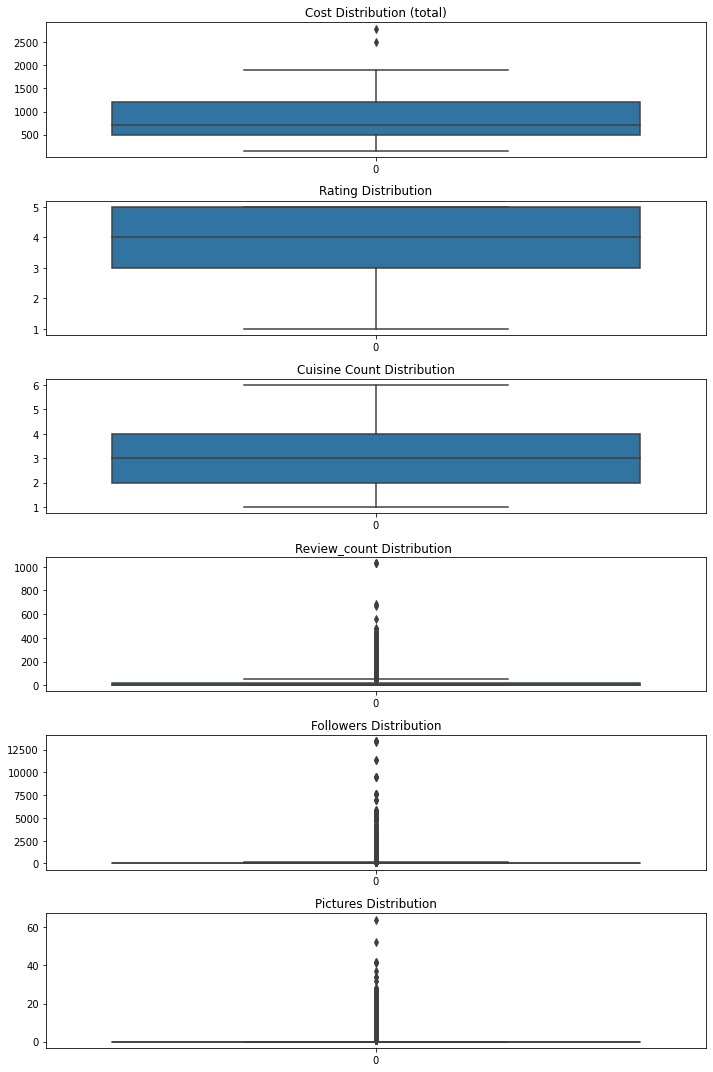

In [ ]:
# Chart - 8 visualization code
# Checking for outliers
fig, ax= plt.subplots(6,1, figsize=(10,15))

ax[0].set_title("Cost Distribution (total)")
sns.boxplot(restaurant_df['Cost'], ax=ax[0])

ax[1].set_title("Rating Distribution")
sns.boxplot(reviews_df['Rating'], ax=ax[1])

ax[2].set_title("Cuisine Count Distribution")
sns.boxplot(restaurant_df['cuisine_count'], ax=ax[2])

ax[3].set_title("Review_count Distribution ")
sns.boxplot(reviews_df['Review_count'], ax=ax[3])

ax[4].set_title("Followers Distribution")
sns.boxplot(reviews_df['Followers'], ax=ax[4])

ax[5].set_title("Pictures Distribution")
sns.boxplot(reviews_df['Pictures'], ax=ax[5])

fig.tight_layout()
fig.show()
plt.show()

##### 1. Why did you pick the specific chart?

Box plots are generally used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide general information about a group of data that whether the data has symmetrical property, skewness, have variance, have outliers or not. So for checking the availability of the rooms, we have used the box plot and also to check outliers we have used it.

##### 2. What is/are the insight(s) found from the chart?

Insights:
* We found that Cost column has some values with high cost of 2500 or more for per person which shows us that there are some most expensive restaurants.   
* 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9 - Correlation Heatmap (Multivariate)

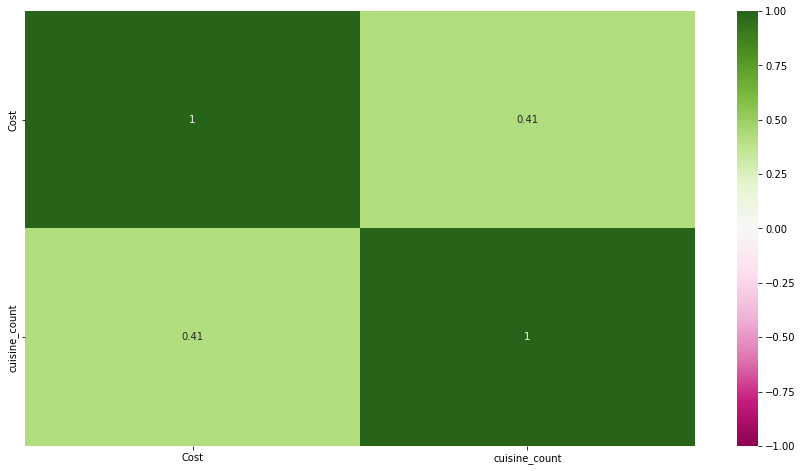

In [ ]:
# Correlation Heatmap visualization code
# For zomato restaurant data
correlation = restaurant_df.corr()
plt.figure(figsize = (15,8))
sns.heatmap(correlation, cmap = 'PiYG', annot = True, vmin = -1, vmax=1)
plt.show()

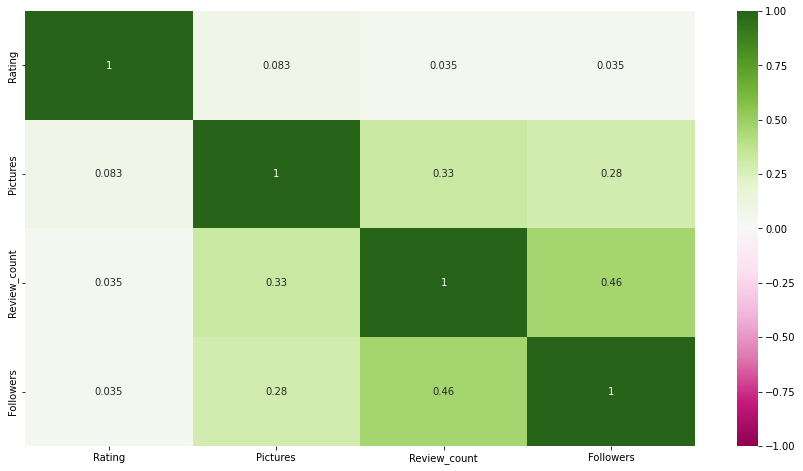

In [ ]:
# Correlation Heatmap visualization code
# For Zomato review data
correlation = reviews_df.corr()
plt.figure(figsize = (15,8))
sns.heatmap(correlation, cmap = 'PiYG', annot = True, vmin = -1, vmax=1)
plt.show()

In [ ]:
# zomato_data is the merged data of zomato restaurant csv and zomatao reviews csv
# corr_matrix = zomato_data.corr()
# cmap=sns.diverging_palette(5, 250, as_cmap=True)

# def magnify():
#     return [dict(selector="th",
#                  props=[("font-size", "7pt")]),
#             dict(selector="td",
#                  props=[('padding', "0em 0em")]),
#             dict(selector="th:hover",
#                  props=[("font-size", "12pt")]),
#             dict(selector="tr:hover td:hover",
#                  props=[('max-width', '200px'),
#                         ('font-size', '12pt')])
# ]

# corr_matrix.style.background_gradient(cmap, axis=1)\
#     .set_properties(**{'max-width': '100px', 'font-size': '10pt'})\
#     .set_caption("Hover to magify")\
#     .set_precision(2)\
#     .set_table_styles(magnify())

##### 1. Why did you pick the specific chart?

A correlation matrix is a table type graph which indicates the results of correlation coefficients tests between variables at a time. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The fluctuation of correlation is lies between -1 to 1.

##### 2. What is/are the insight(s) found from the chart?

Insights:
* There are 46% of positive correlation b/w Review_count and Followers.
* There are positive correlation between Cuisine_count and cost i.e. the restaurant with more number of cuisine has higher cost as compared to the restauranr with less number of cuisine.
* There are also 33% of positive correlation b/w review_count and pictures.
* we conclude that there is no strong correlation between any variables

#### Chart - 10 - Pair Plot (Multivariate)

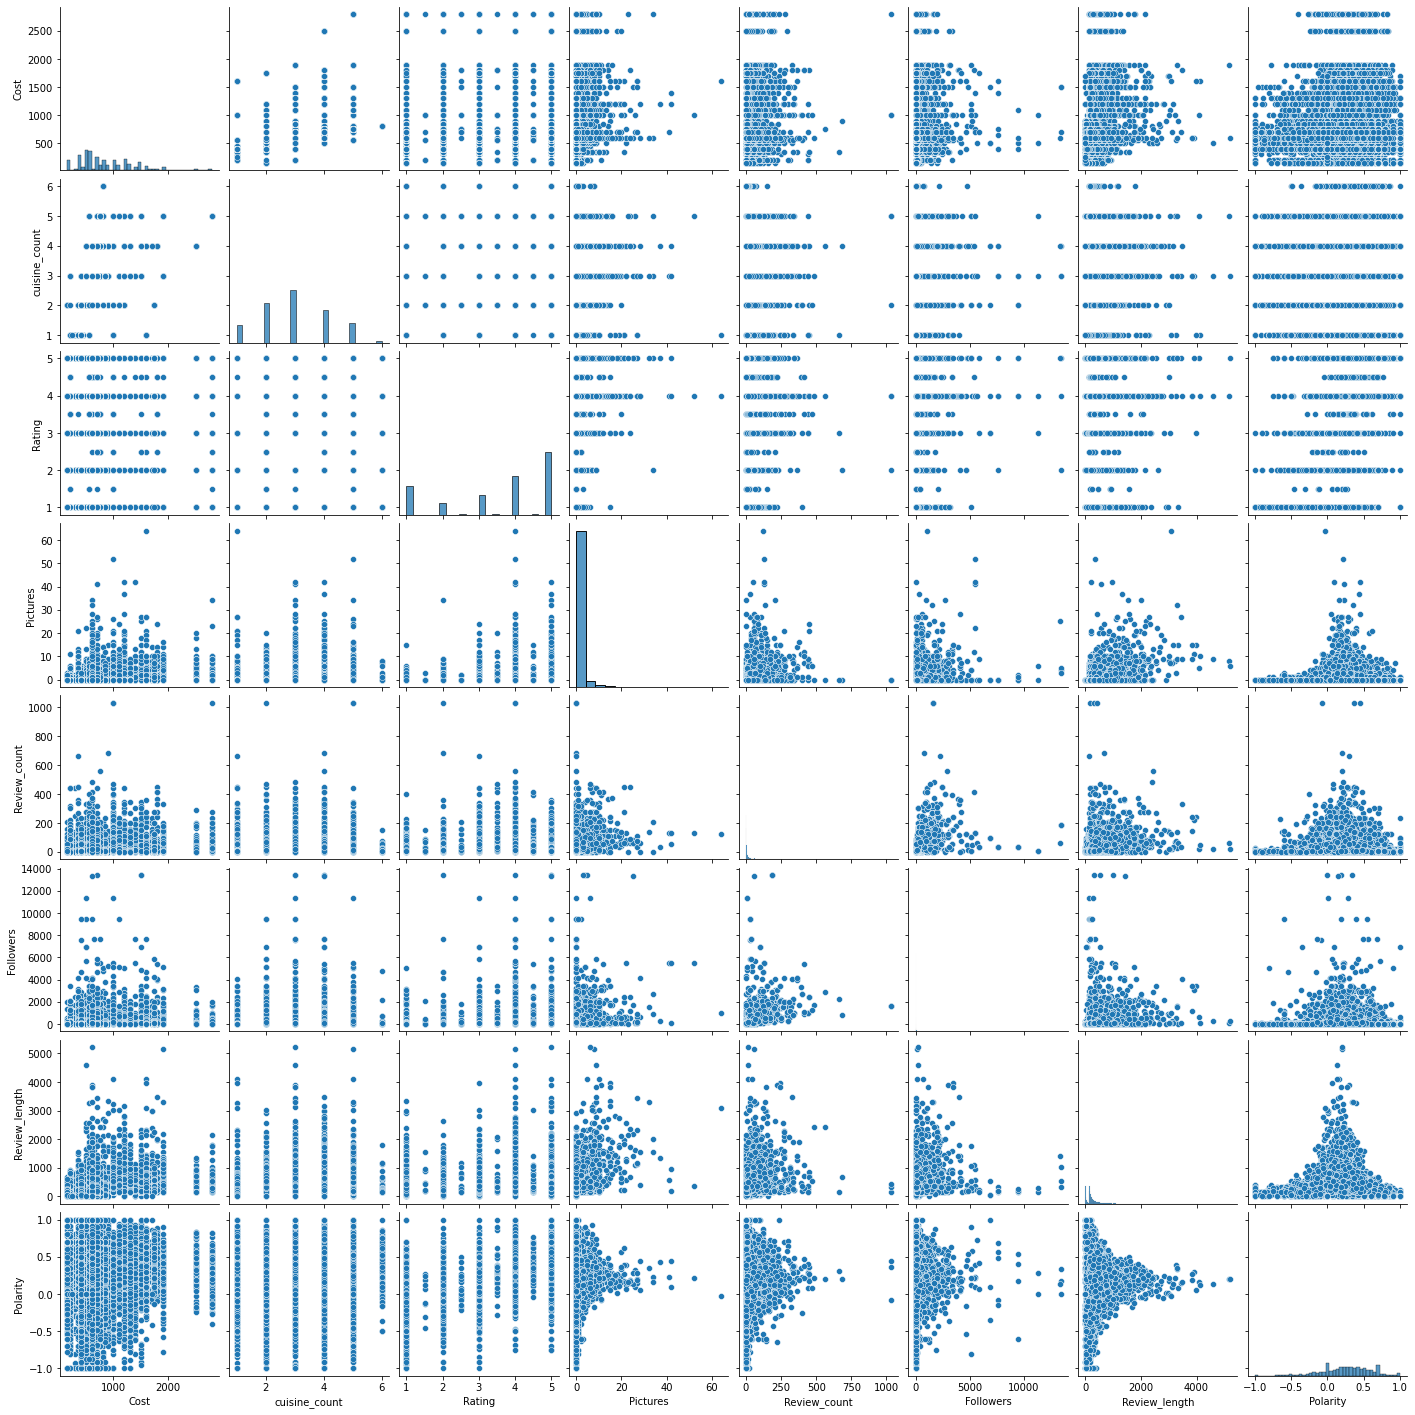

In [ ]:
# Pair Plot visualization code
sns.pairplot(zomato_data)
plt.show()

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

Thus, we used pair plot to analyse the patterns of data and realationship between the first 10 important features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

It can be seen that there is no significant correlation between the given features in the merged dataframe.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

#### Handling Missing Values in Zomato Restaurant Dataset

In [ ]:
pd.set_option('display.max_rows', None)
# Handling Missing Values & Missing Value Imputation
restaurant_df.isna().sum()

Restaurant_name        0
Links                  0
Cost                   0
Collections           54
Cuisines               0
Restaurant_timings     1
cuisine_count          0
dtype: int64

In [ ]:
#checking null values in Collections
missing_percentage = ((restaurant_df['Collections'].isnull().sum())/(len(restaurant_df['Collections'])))*100
print(f'Percentage of missing value in Collections is {round(missing_percentage, 2)}%')

Percentage of missing value in Collections is 51.43%


In [ ]:
# We can drop the collection column since it has more than 50% of null values
# But we are Filling null value in collection column with 'not avaialble' tag.
restaurant_df['Collections'].fillna('Not Available', inplace=True)
restaurant_df['Collections'].isna().sum()

0

In [ ]:
# Dropping null value in 'Timings' column as it will not affect our data
restaurant_df.dropna(inplace=True) 
restaurant_df.isnull().sum()

Restaurant_name       0
Links                 0
Cost                  0
Collections           0
Cuisines              0
Restaurant_timings    0
cuisine_count         0
dtype: int64

#### Handling Missing Values in Zomato Reviews Datasets

In [ ]:
reviews_df.isna().sum()

Restaurant_name     0
Customer_Name      38
Review              0
Rating             38
Review_timing      38
Pictures            0
Review_count        0
Followers           0
dtype: int64

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Dropping rows with null values in customer name column
reviews_df.dropna(subset=['Customer_Name'], inplace=True)

In [ ]:
# Hotels without reviews
hotel_without_review = [name for name in restaurant_df.Restaurant_name.unique().tolist() if name not in reviews_df.Restaurant_name.unique().tolist()]
hotel_without_review

['IndiBlaze',
 'Sweet Basket',
 'Angaara Counts 3',
 'Wich Please',
 'Republic Of Noodles - Lemon Tree Hotel']

In [ ]:
reviews_df.isnull().sum()

Restaurant_name    0
Customer_Name      0
Review             0
Rating             0
Review_timing      0
Pictures           0
Review_count       0
Followers          0
dtype: int64

In [ ]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9961 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Restaurant_name  9961 non-null   object        
 1   Customer_Name    9961 non-null   object        
 2   Review           9961 non-null   object        
 3   Rating           9961 non-null   float64       
 4   Review_timing    9961 non-null   datetime64[ns]
 5   Pictures         9961 non-null   int64         
 6   Review_count     9961 non-null   int64         
 7   Followers        9961 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 700.4+ KB


#### What all missing value imputation techniques have you used and why did you use those techniques?

There are two approch to handle the missing values i.e. Deleting the Missing values and Imputing the Missing Values.

We have used both of the methods here.

In Zomato Restaurant Dataset, For the Timing column where one row has a null values, we used first approch that is Deleting the missing values.
While another columns named collections has more number of rows with null values so there we have use second approch of imputing the null values. Here, in this column, we are imputing the null values with arbitary values and made an educated guess about the missing value with 'Not Available' tag.

Next in Zomato Reviews Dataset, Customer name column has maximum number of missing value with 57 rows so here we have deleted the missing value with the dropna() function. Then, Review column has null values where we have filled the values with a string commenting 'No review provided'. 

### 2. Handling Outliers

In [ ]:
zomato_data.columns

Index(['Restaurant_name', 'Links', 'Cost', 'Collections', 'Cuisines',
       'Restaurant_timings', 'cuisine_count', 'Customer_Name', 'Review',
       'Rating', 'Review_timing', 'Pictures', 'Review_count', 'Followers',
       'Review_length', 'Polarity'],
      dtype='object')

#### Anomaly Detection

Univariate Anomaly Detection

Cost Variable Analysis

In [ ]:
# Handling Outliers & Outlier treatments
# Checking skewness and kurtosis for cost column
print("Skewness: %f" % zomato_data['Cost'].skew())
print("Kurtosis: %f" % zomato_data['Cost'].kurt())

Skewness: 1.153081
Kurtosis: 1.568703


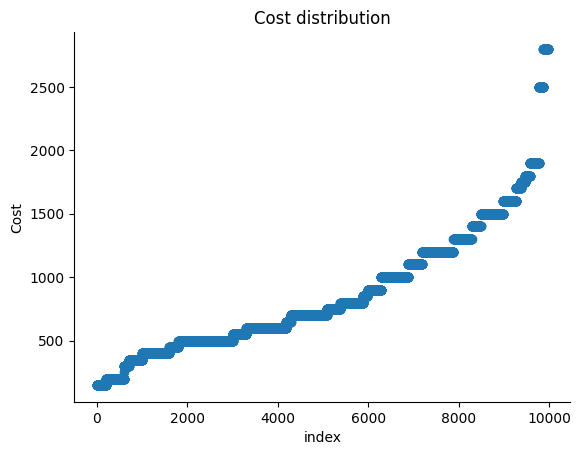

In [ ]:
plt.scatter(range(zomato_data.shape[0]), np.sort(zomato_data['Cost'].values))
plt.xlabel('index')
plt.ylabel('Cost')
plt.title("Cost distribution")
sns.despine()

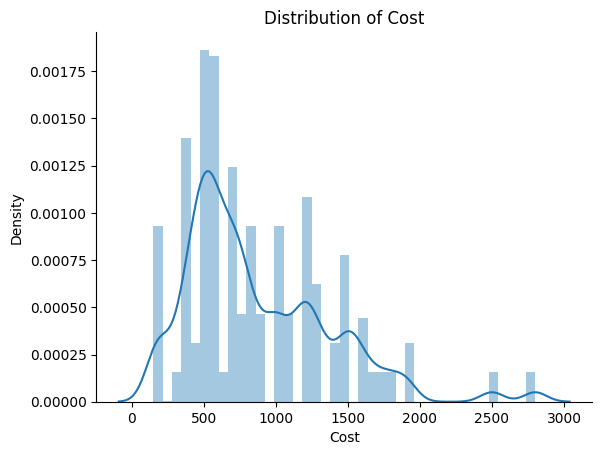

In [ ]:
sns.distplot(zomato_data['Cost'])
plt.title("Distribution of Cost")
sns.despine()

Cost variable is highly positively skewed and having some outliers also. So we will further work on it using Anomoly Detection Algorithm.

Ratings Variable Analysis

In [ ]:
# Checking skewness and kurtosis for rating column
print("Skewness: %f" % zomato_data['Rating'].skew())
print("Kurtosis: %f" % zomato_data['Rating'].kurt())

Skewness: -0.707928
Kurtosis: -0.946219


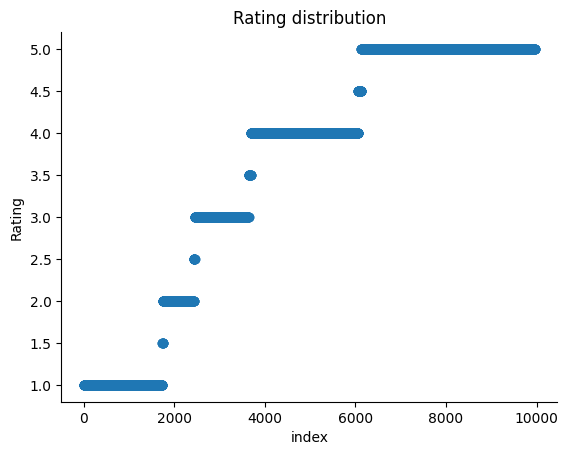

In [ ]:
plt.scatter(range(zomato_data.shape[0]), np.sort(zomato_data['Rating'].values))
plt.xlabel('index')
plt.ylabel('Rating')
plt.title("Rating distribution")
sns.despine()

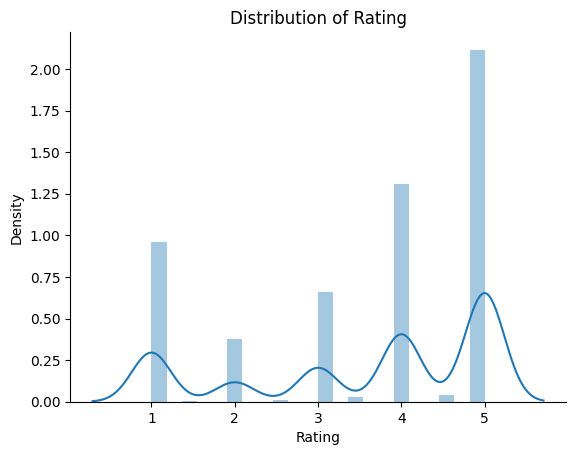

In [ ]:
sns.distplot(zomato_data['Rating'])
plt.title("Distribution of Rating")
sns.despine()

Ratings variable is slightly skewed and having no outliers. So we will leave it as it is.

Followers Variable Analysis

In [ ]:
# Checking skewness and kurtosis for follower column
print("Skewness: %f" % zomato_data['Followers'].skew())
print("Kurtosis: %f" % zomato_data['Followers'].kurt())

Skewness: 10.093660
Kurtosis: 151.341778


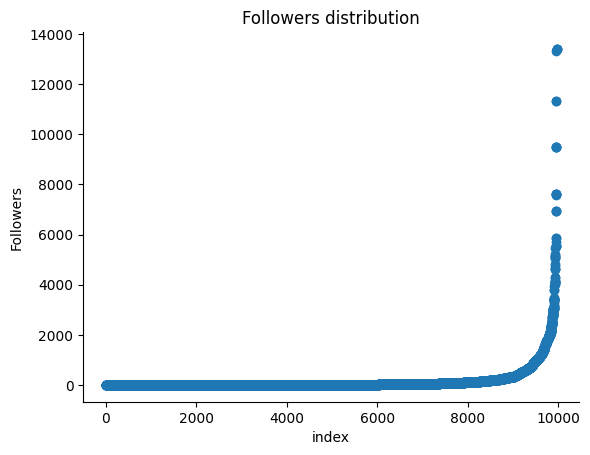

In [ ]:
plt.scatter(range(zomato_data.shape[0]), np.sort(zomato_data['Followers'].values))
plt.xlabel('index')
plt.ylabel('Followers')
plt.title("Followers distribution")
sns.despine()

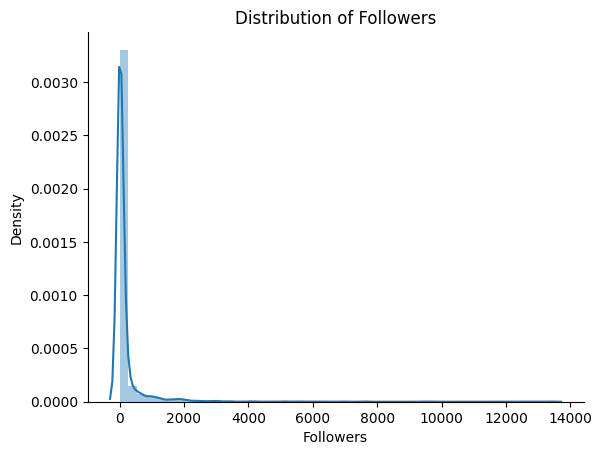

In [ ]:
sns.distplot(zomato_data['Followers'])
plt.title("Distribution of Followers")
sns.despine()

Followers variable is highly positively skewed and having some outliers. So we will further work on it using Anomoly Detection Algorithm.

Polarity Variable Analysis

In [ ]:
# Checking skewness and kurtosis for Polarity column
print("Skewness: %f" % zomato_data['Polarity'].skew())
print("Kurtosis: %f" % zomato_data['Polarity'].kurt())

Skewness: -0.578204
Kurtosis: 0.548629


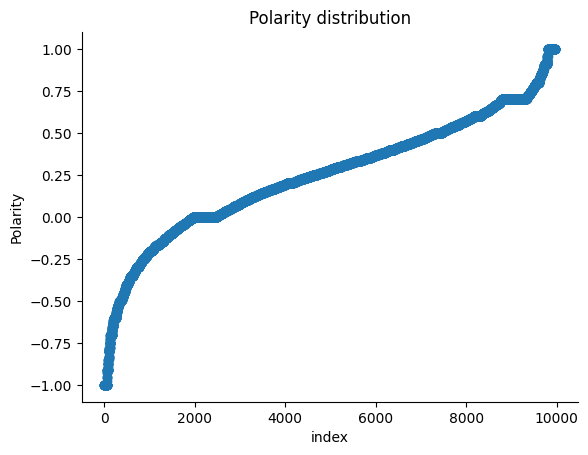

In [ ]:
plt.scatter(range(zomato_data.shape[0]), np.sort(zomato_data['Polarity'].values))
plt.xlabel('index')
plt.ylabel('Polarity')
plt.title("Polarity distribution")
sns.despine()

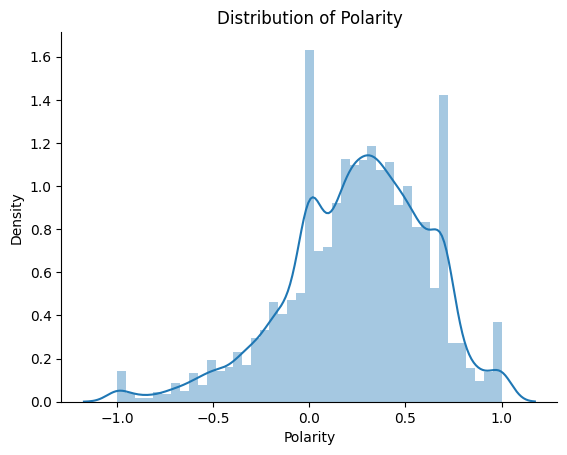

In [ ]:
sns.distplot(zomato_data['Polarity'])
plt.title("Distribution of Polarity")
sns.despine()

Polarity Column has nearly symmetrical data and has not outliers

**Isolation Forest Algorithm for Cost**

In [ ]:
from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(restaurant_df['Cost'].values.reshape(-1, 1))
restaurant_df['anomaly_score_univariate_Cost'] = isolation_forest.decision_function(restaurant_df['Cost'].values.reshape(-1, 1))
restaurant_df['outlier_univariate_Cost'] = isolation_forest.predict(restaurant_df['Cost'].values.reshape(-1, 1))

In [ ]:
restaurant_df.head()

,Restaurant_name,Links,Cost,Collections,Cuisines,Restaurant_timings,cuisine_count,anomaly_score_univariate_Cost,outlier_univariate_Cost
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavours-gachibowli,800,"Food Hygiene Rated Restaurants in Hyderabad, Corporate Favorites, Great Buffets, Top-Rated, Gold Curated, Live Sports Screenings","Chinese, Continental, Kebab, European, South Indian, North Indian","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",6,0.300020,1
1,Paradise,https://www.zomato.com/hyderabad/paradise-gachibowli,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM,3,0.300020,1
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gachibowli,1300,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM",4,0.266786,1
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-hotel-restaurant-gachibowli,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Beverages",12 Noon to 2 AM,5,0.300020,1
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon-brew-company-gachibowli,1200,"Best Bars & Pubs, Food Hygiene Rated Restaurants in Hyderabad, Top-Rated, Gold Curated, Hyderabad's Hottest","Asian, Continental, North Indian, Chinese, Mediterranean","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12noon to 12midnight (Fri-Sat)",5,0.303171,1


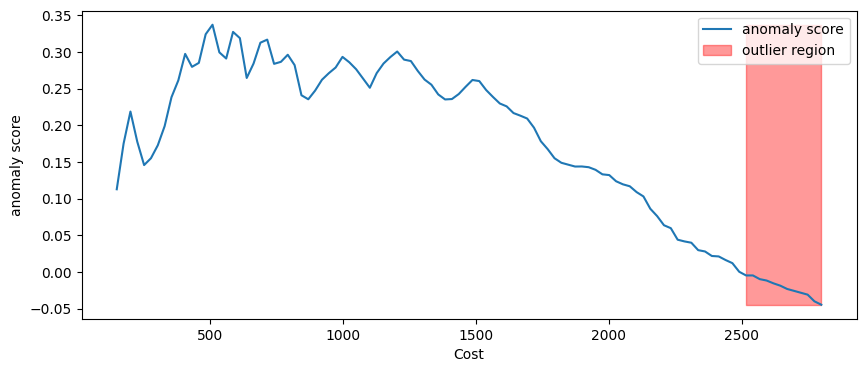

In [ ]:
xx = np.linspace(restaurant_df['Cost'].min(), restaurant_df['Cost'].max(), len(restaurant_df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)

plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Cost')
plt.show();

**Isolation Forest Algorithm for Followers**

In [ ]:
from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(n_estimators=20, contamination=0.01)
isolation_forest.fit(reviews_df['Followers'].isna().values.reshape(-1, 1))
reviews_df['anomaly_score_univariate_followers'] = isolation_forest.decision_function(reviews_df['Followers'].values.reshape(-1, 1))
reviews_df['outlier_univariate_followers'] = isolation_forest.predict(reviews_df['Followers'].values.reshape(-1, 1))

In [ ]:
reviews_df.head(10)

,Restaurant_name,Customer_Name,Review,Rating,Review_timing,Pictures,Review_count,Followers,anomaly_score_univariate_followers,outlier_univariate_followers
0,Beyond Flavours,Rusha Chakraborty,"[""['ambience'"", ""'quite'"", ""'saturday'"", ""'lunch'"", ""'cost'"", ""'effective'"", ""'sate'"", ""'brunch'"", ""'chill'"", ""'friends'"", ""'parents'"", ""'waiter'"", ""'soumen'"", ""'das'"", ""'really'"", ""'courteous'"", ""'helpful']""]",5.0,2019-05-25 15:54:00,0,1,2,0.0,1
1,Beyond Flavours,Anusha Tirumalaneedi,"[""['ambience'"", ""'pleasant'"", ""'evening'"", ""'service'"", ""'prompt'"", ""'experience'"", ""'soumen'"", ""'das'"", ""'-'"", ""'kudos'"", ""'service']""]",5.0,2019-05-25 14:20:00,0,3,2,0.0,1
2,Beyond Flavours,Ashok Shekhawat,"[""['must'"", ""'try'"", ""'great'"", ""'great'"", ""'ambience'"", ""'thnx'"", ""'service'"", ""'pradeep'"", ""'subroto'"", ""'personal'"", ""'recommendation'"", ""'penne'"", ""'alfredo'"", ""'pasta:)'"", ""'music'"", ""'background'"", ""'amazing']""]",5.0,2019-05-24 22:54:00,0,2,3,0.0,1
3,Beyond Flavours,Swapnil Sarkar,"[""['soumen'"", ""'das'"", ""'arun'"", ""'great'"", ""'guy'"", ""'behavior'"", ""'sincerety'"", ""'course'"", ""'would'"", ""'like'"", ""'visit']""]",5.0,2019-05-24 22:11:00,0,1,1,0.0,1
4,Beyond Flavours,Dileep,"[""['goodwe'"", ""'kodi'"", ""'drumsticks'"", ""'basket'"", ""'mutton'"", ""'biryani'"", ""'thanks'"", ""'pradeep'"", ""'served'"", ""'enjoyed'"", ""'ambience']""]",5.0,2019-05-24 21:37:00,0,3,2,0.0,1
5,Beyond Flavours,Nagabhavani K,"[""['ambiance'"", ""'service'"", ""'apradeecp'"", ""'subro'"", ""'best'"", ""'service'"", ""'papiya'"", ""'hostess'"", ""'ur'"", ""'caption'"", ""'4star']""]",5.0,2019-05-24 15:22:00,0,1,0,0.0,1
6,Beyond Flavours,Jamuna Bhuwalka,"[""['nice'"", ""'ambience'"", ""'different'"", ""'tasty'"", ""'service'"", ""'gud'"", ""'worth'"", ""'visit'"", ""'reasonable'"", ""'really'"", ""'must'"", ""'visit']""]",5.0,2019-05-24 01:02:00,0,1,0,0.0,1
7,Beyond Flavours,Sandhya S,"[""['reading'"", ""'many'"", ""'reviews'"", ""'finally'"", ""'visited'"", ""'placeambience'"", ""'coming'"", ""'crispy'"", ""'corn'"", ""'nice'"", ""'tawa'"", ""'fish'"", ""'ok'"", ""'basket'"", ""'biryani'"", ""'disappointed'"", ""'us'"", ""'biryani'"", ""'ok'"", ""'flattering'"", ""'claimed'"", ""'staff'"", ""'polite'"", ""'prompt'"", ""'especially'"", ""'pradeep'"", ""'suman']""]",4.0,2019-05-23 15:01:00,0,1,0,0.0,1
8,Beyond Flavours,Akash Thorat,"[""['excellent'"", ""'specially'"", ""'like'"", ""'spicy'"", ""'courteous'"", ""'staff'"", ""'shubro'"", ""'pradeep'"", ""'papiya'"", ""'gave'"", ""'excellent'"", ""'service'"", ""'corporate'"", ""'team'"", ""'dinner'"", ""'overall'"", ""'great'"", ""'team'"", ""'dinners'"", ""'party']""]",5.0,2019-05-22 23:12:00,0,1,1,0.0,1
9,Beyond Flavours,Smarak Patnaik,"[""['came'"", ""'birthday'"", ""'treat'"", ""'close'"", ""'friend'"", ""'perfect'"", ""'treat'"", ""'like'"", ""'hospitable'"", ""'cooperative'"", ""'staff'"", ""'delicious'"", ""'ambience'"", ""'really'"", ""'music'"", ""'lighting'"", ""'chili'"", ""'honey'"", ""'lotus'"", ""'stem'"", ""'must'"", ""'try'"", ""'special'"", ""'mention'"", ""'papiya'"", ""'took'"", ""'care'"", ""'us']""]",5.0,2019-05-22 22:37:00,0,1,1,0.0,1


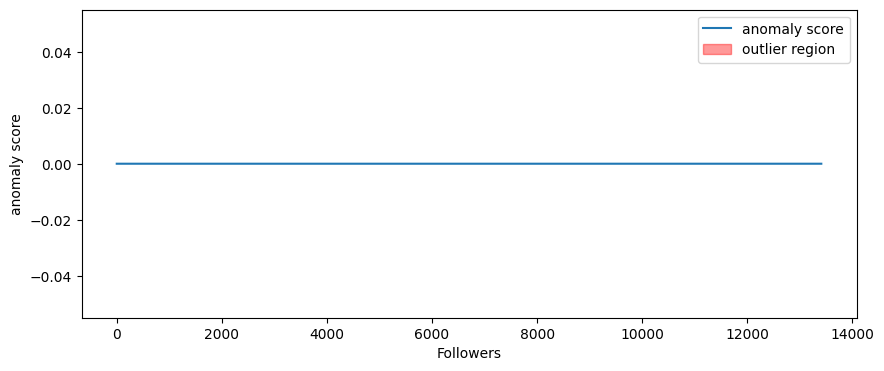

In [ ]:
xx = np.linspace(reviews_df['Followers'].min(), reviews_df['Followers'].max(), len(reviews_df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)

plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Followers')
plt.show();

Outlier/Anomaly Treatment

In [ ]:
def drop_outliers_iqr(df, column):
    Q1, Q3 = np.percentile(df[column], [25, 75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return upper_bound, lower_bound

outlier treatment on cost column

In [ ]:
# calling the above function and Dropping the outlier in cost column
cost_after_outlier1 = drop_outliers_iqr(df = zomato_data, column = 'Cost')[1]
cost_after_outlier0 = drop_outliers_iqr(df = zomato_data, column = 'Cost')[0]

In [ ]:
# creating lower and upper boundary for cost column
zomato_data.loc[zomato_data['Cost'] <= drop_outliers_iqr(df=zomato_data, column='Cost')[1], 'Cost'] = cost_after_outlier1
zomato_data.loc[zomato_data['Cost'] >= drop_outliers_iqr(df=zomato_data, column='Cost')[0], 'Cost'] = cost_after_outlier0

outlier treatment on followers column

In [ ]:
# calling the above function and Dropping the outlier in follower column
followers_after_outlier1 = drop_outliers_iqr(df = zomato_data, column = 'Followers')[1]
followers_after_outlier0 = drop_outliers_iqr(df = zomato_data, column = 'Followers')[0]

In [ ]:
# creating lower and upper boundary for cost column
zomato_data.loc[zomato_data['Followers'] <= drop_outliers_iqr(df=zomato_data, column='Followers')[1], 'Followers'] = cost_after_outlier1
zomato_data.loc[zomato_data['Followers'] >= drop_outliers_iqr(df=zomato_data, column='Followers')[0], 'Followers'] = cost_after_outlier0

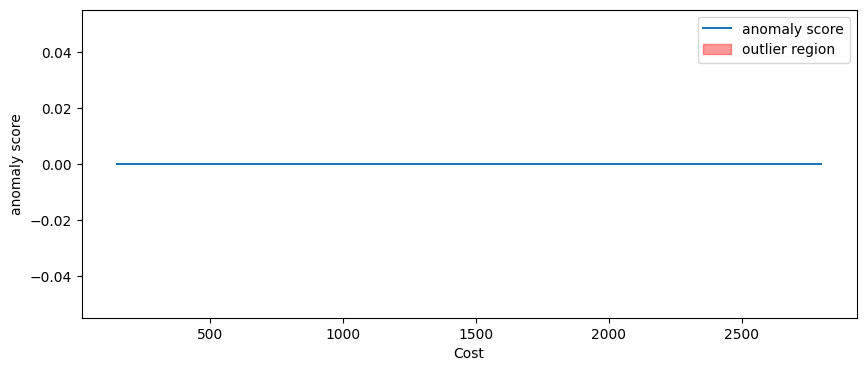

In [ ]:
xx = np.linspace(restaurant_df['Cost'].min(), restaurant_df['Cost'].max(), len(restaurant_df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)

plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Cost')
plt.show();

##### What all outlier treatment techniques have you used and why did you use those techniques?

Ideally, IQR method is best suited for datasets which are skewed (either left or right). The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.

Quantile based flooring and capping - In this technique, the data points that are less than the 25th percentile are replaced with its 25th percentile value and the data points at are greater than the 75th percentile are replaced by 75th percentile value.

### 3. Categorical Encoding

In [ ]:
dummy_df = zomato_data.copy()
dummy_df.head()

,Restaurant_name,Links,Cost,Collections,Cuisines,Restaurant_timings,cuisine_count,Customer_Name,Review,Rating,Review_timing,Pictures,Review_count,Followers,Review_length,Polarity
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavours-gachibowli,800,"Food Hygiene Rated Restaurants in Hyderabad, Corporate Favorites, Great Buffets, Top-Rated, Gold Curated, Live Sports Screenings","Chinese, Continental, Kebab, European, South Indian, North Indian","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",6,Rusha Chakraborty,"The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.",5.0,2019-05-25 15:54:00,0.0,1.0,2.0,222,0.660000
1,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavours-gachibowli,800,"Food Hygiene Rated Restaurants in Hyderabad, Corporate Favorites, Great Buffets, Top-Rated, Gold Curated, Live Sports Screenings","Chinese, Continental, Kebab, European, South Indian, North Indian","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",6,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service,5.0,2019-05-25 14:20:00,0.0,3.0,2.0,144,0.606667
2,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavours-gachibowli,800,"Food Hygiene Rated Restaurants in Hyderabad, Corporate Favorites, Great Buffets, Top-Rated, Gold Curated, Live Sports Screenings","Chinese, Continental, Kebab, European, South Indian, North Indian","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",6,Ashok Shekhawat,A must try.. great food great ambience. Thnx for the service by Pradeep and Subroto. My personal recommendation is Penne Alfredo Pasta:) ....... Also the music in the background is amazing.,5.0,2019-05-24 22:54:00,0.0,2.0,3.0,189,0.540000
3,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavours-gachibowli,800,"Food Hygiene Rated Restaurants in Hyderabad, Corporate Favorites, Great Buffets, Top-Rated, Gold Curated, Live Sports Screenings","Chinese, Continental, Kebab, European, South Indian, North Indian","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",6,Swapnil Sarkar,"Soumen das and Arun was a great guy. Only because of their behavior and sincerety, And good food off course, I would like to visit this place again.",5.0,2019-05-24 22:11:00,0.0,1.0,1.0,148,0.500000
4,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavours-gachibowli,800,"Food Hygiene Rated Restaurants in Hyderabad, Corporate Favorites, Great Buffets, Top-Rated, Gold Curated, Live Sports Screenings","Chinese, Continental, Kebab, European, South Indian, North Indian","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",6,Dileep,Food is good.we ordered Kodi drumsticks and basket mutton biryani. All are good. Thanks to Pradeep. He served well. We enjoyed here. Ambience is also very good.,5.0,2019-05-24 21:37:00,0.0,3.0,2.0,160,0.577500


In [ ]:
# Encode your categorical columns
# Encode Categorical Variables - one hot encoding
from sklearn.preprocessing import OneHotEncoder 
onehotencoder = OneHotEncoder() 
one_hot_Foundation = onehotencoder.fit_transform(np.array(zomato_data['Cuisines']).reshape(-1,1)).toarray()
one_hot_Foundation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
zomato_data['Cuisines'].value_counts()

North Indian, Chinese                                                400
North Indian                                                         300
Ice Cream, Desserts                                                  200
Biryani, North Indian, Chinese                                       200
South Indian, North Indian, Chinese                                  200
North Indian, Chinese, Biryani                                       200
North Indian, Chinese, Continental                                   200
Continental                                                          186
North Indian, Biryani, Chinese                                       101
Fast Food                                                            101
Kebab, Continental, Italian, North Indian                            100
Desserts, Beverages                                                  100
Cafe, Fast Food, Beverages                                           100
Bakery, Desserts                                   

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction
# creating new df for text processing 
text_df = reviews_df[['Restaurant_name','Review']]
text_df.tail(2)

,Restaurant_name,Review
9998,Chinese Pavilion,"[""['personally'"", ""'love'"", ""'prefer'"", ""'chinese'"", ""'couple'"", ""'times'"", ""'husband'"", ""'ambiance'"", ""'entrance'"", ""'carvings'"", ""'walls'"", ""'nicely'"", ""'decorated'"", ""'server'"", ""'polite'"", ""'comes'"", ""'disappointthis'"", ""'small/comfy'"", ""'surprisingly'"", ""'crowded'"", ""'even'"", ""'weekends'"", ""'went'"", ""'anniversary'"", ""'celebrations'"", ""'perfect'"", ""'crowd'"", ""'got'"", ""'attention'"", ""'service'"", ""'looking']""]"
9999,Chinese Pavilion,"[""['checked'"", ""'try'"", ""'delicious'"", ""'chinese'"", ""'seen'"", ""'non-veg'"", ""'luncheon'"", ""'tray'"", ""'menu'"", ""'ans'"", ""'tried'"", ""'charging'"", ""'300+'"", ""'taxes'"", ""'started'"", ""'manchow'"", ""'soup'"", ""'liked'"", ""'instantly'"", ""'thereafter'"", ""'luncheon'"", ""'tray'"", ""'came'"", ""'pepper'"", ""'chicken'"", ""'starter'"", ""'kimchi'"", ""'(salad)'"", ""'wolly'"", ""'chicken'"", ""'egg'"", ""'fried'"", ""'rice'"", ""'egg'"", ""'hakka'"", ""'noodles'"", ""'fine'"", ""'liked'"", ""'eating'"", ""'egg'"", ""'hakka'"", ""'noodles'"", ""'egg'"", ""'fried'"", ""'rice'"", ""'time'"", ""'badly'"", ""'missed'"", ""'dessert'"", ""'along'"", ""'tray'"", ""'(dnt'"", ""'mind'"", ""'extra'"", ""'price)'"", ""'value'"", ""'money'"", ""'fine'"", ""'ambience']""]"


In [ ]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 KB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 KB 14.5 MB/s eta 0:00:00


In [ ]:
import contractions
# using contractions.fix to expand the shortened words in reviews col
text_df['Review'] = text_df['Review'].fillna('No Reviews Provided').apply(lambda x:contractions.fix(x))

# using contractions.fix to expand the shortened words in Restaurant name col
text_df['Restaurant_name'] = text_df['Restaurant_name'].apply(lambda x:contractions.fix(x))

In [ ]:
text_df.tail(2)

,Restaurant_name,Review
9998,Chinese Pavilion,"[""['personally'"", ""'love'"", ""'prefer'"", ""'chinese'"", ""'couple'"", ""'times'"", ""'husband'"", ""'ambiance'"", ""'entrance'"", ""'carvings'"", ""'walls'"", ""'nicely'"", ""'decorated'"", ""'server'"", ""'polite'"", ""'comes'"", ""'disappointthis'"", ""'small/comfy'"", ""'surprisingly'"", ""'crowded'"", ""'even'"", ""'weekends'"", ""'went'"", ""'anniversary'"", ""'celebrations'"", ""'perfect'"", ""'crowd'"", ""'got'"", ""'attention'"", ""'service'"", ""'looking']""]"
9999,Chinese Pavilion,"[""['checked'"", ""'try'"", ""'delicious'"", ""'chinese'"", ""'seen'"", ""'non-veg'"", ""'luncheon'"", ""'tray'"", ""'menu'"", ""'ans'"", ""'tried'"", ""'charging'"", ""'300+'"", ""'taxes'"", ""'started'"", ""'manchow'"", ""'soup'"", ""'liked'"", ""'instantly'"", ""'thereafter'"", ""'luncheon'"", ""'tray'"", ""'came'"", ""'pepper'"", ""'chicken'"", ""'starter'"", ""'kimchi'"", ""'(salad)'"", ""'wolly'"", ""'chicken'"", ""'egg'"", ""'fried'"", ""'rice'"", ""'egg'"", ""'hakka'"", ""'noodles'"", ""'fine'"", ""'liked'"", ""'eating'"", ""'egg'"", ""'hakka'"", ""'noodles'"", ""'egg'"", ""'fried'"", ""'rice'"", ""'time'"", ""'badly'"", ""'missed'"", ""'dessert'"", ""'along'"", ""'tray'"", ""'(dnt'"", ""'mind'"", ""'extra'"", ""'price)'"", ""'value'"", ""'money'"", ""'fine'"", ""'ambience']""]"


#### 2. Lower Casing

In [ ]:
# Lower Casing
text_df['Review'] = text_df['Review'].str.lower()
text_df.tail(2)

,Restaurant_name,Review
9998,Chinese Pavilion,"[""['personally'"", ""'love'"", ""'prefer'"", ""'chinese'"", ""'couple'"", ""'times'"", ""'husband'"", ""'ambiance'"", ""'entrance'"", ""'carvings'"", ""'walls'"", ""'nicely'"", ""'decorated'"", ""'server'"", ""'polite'"", ""'comes'"", ""'disappointthis'"", ""'small/comfy'"", ""'surprisingly'"", ""'crowded'"", ""'even'"", ""'weekends'"", ""'went'"", ""'anniversary'"", ""'celebrations'"", ""'perfect'"", ""'crowd'"", ""'got'"", ""'attention'"", ""'service'"", ""'looking']""]"
9999,Chinese Pavilion,"[""['checked'"", ""'try'"", ""'delicious'"", ""'chinese'"", ""'seen'"", ""'non-veg'"", ""'luncheon'"", ""'tray'"", ""'menu'"", ""'ans'"", ""'tried'"", ""'charging'"", ""'300+'"", ""'taxes'"", ""'started'"", ""'manchow'"", ""'soup'"", ""'liked'"", ""'instantly'"", ""'thereafter'"", ""'luncheon'"", ""'tray'"", ""'came'"", ""'pepper'"", ""'chicken'"", ""'starter'"", ""'kimchi'"", ""'(salad)'"", ""'wolly'"", ""'chicken'"", ""'egg'"", ""'fried'"", ""'rice'"", ""'egg'"", ""'hakka'"", ""'noodles'"", ""'fine'"", ""'liked'"", ""'eating'"", ""'egg'"", ""'hakka'"", ""'noodles'"", ""'egg'"", ""'fried'"", ""'rice'"", ""'time'"", ""'badly'"", ""'missed'"", ""'dessert'"", ""'along'"", ""'tray'"", ""'(dnt'"", ""'mind'"", ""'extra'"", ""'price)'"", ""'value'"", ""'money'"", ""'fine'"", ""'ambience']""]"


#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
import re

# Regular expression pattern to match non-English and special characters
non_english_pattern = re.compile(r'[^\w\s]+|[^\x00-\x7F]n+')

# Replace non-English and special characters with empty string
text_df['Review'] = text_df['Review'].str.replace(non_english_pattern, '')
text_df.tail(2)

,Restaurant_name,Review
9998,Chinese Pavilion,personally love prefer chinese couple times husband ambiance entrance carvings walls nicely decorated server polite comes disappointthis smallcomfy surprisingly crowded even weekends went anniversary celebrations perfect crowd got attention service looking
9999,Chinese Pavilion,checked try delicious chinese seen nonveg luncheon tray menu ans tried charging 300 taxes started manchow soup liked instantly thereafter luncheon tray came pepper chicken starter kimchi salad wolly chicken egg fried rice egg hakka noodles fine liked eating egg hakka noodles egg fried rice time badly missed dessert along tray dnt mind extra price value money fine ambience


In [ ]:
len(text_df[(text_df['Review']==' ')])

0

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
import nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# stop words  
stop_words = set(stopwords.words('english'))

# removing stop word from review col
zomato_data['Review'] = zomato_data['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
zomato_data.head(5)

,Restaurant_name,Links,Cost,Collections,Cuisines,Restaurant_timings,cuisine_count,Customer_Name,Review,Rating,Review_timing,Pictures,Review_count,Followers,Review_length,Polarity
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavours-gachibowli,800,"Food Hygiene Rated Restaurants in Hyderabad, Corporate Favorites, Great Buffets, Top-Rated, Gold Curated, Live Sports Screenings","Chinese, Continental, Kebab, European, South Indian, North Indian","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",6,Rusha Chakraborty,"The ambience good, food quite good . Saturday lunch , cost effective . Good place sate brunch. One also chill friends parents. Waiter Soumen Das really courteous helpful.",5.0,2019-05-25 15:54:00,0.0,1.0,2.0,222,0.660000
1,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavours-gachibowli,800,"Food Hygiene Rated Restaurants in Hyderabad, Corporate Favorites, Great Buffets, Top-Rated, Gold Curated, Live Sports Screenings","Chinese, Continental, Kebab, European, South Indian, North Indian","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",6,Anusha Tirumalaneedi,Ambience good pleasant evening. Service prompt. Food good. Over good experience. Soumen Das - kudos service,5.0,2019-05-25 14:20:00,0.0,3.0,2.0,144,0.606667
2,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavours-gachibowli,800,"Food Hygiene Rated Restaurants in Hyderabad, Corporate Favorites, Great Buffets, Top-Rated, Gold Curated, Live Sports Screenings","Chinese, Continental, Kebab, European, South Indian, North Indian","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",6,Ashok Shekhawat,A must try.. great food great ambience. Thnx service Pradeep Subroto. My personal recommendation Penne Alfredo Pasta:) ....... Also music background amazing.,5.0,2019-05-24 22:54:00,0.0,2.0,3.0,189,0.540000
3,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavours-gachibowli,800,"Food Hygiene Rated Restaurants in Hyderabad, Corporate Favorites, Great Buffets, Top-Rated, Gold Curated, Live Sports Screenings","Chinese, Continental, Kebab, European, South Indian, North Indian","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",6,Swapnil Sarkar,"Soumen das Arun great guy. Only behavior sincerety, And good food course, I would like visit place again.",5.0,2019-05-24 22:11:00,0.0,1.0,1.0,148,0.500000
4,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavours-gachibowli,800,"Food Hygiene Rated Restaurants in Hyderabad, Corporate Favorites, Great Buffets, Top-Rated, Gold Curated, Live Sports Screenings","Chinese, Continental, Kebab, European, South Indian, North Indian","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",6,Dileep,Food good.we ordered Kodi drumsticks basket mutton biryani. All good. Thanks Pradeep. He served well. We enjoyed here. Ambience also good.,5.0,2019-05-24 21:37:00,0.0,3.0,2.0,160,0.577500


In [ ]:
# Remove White spaces
zomato_data['Review'] = zomato_data['Review'].str.strip()

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization
zomato_data['Review'].dropna(inplace=True)
zomato_data['Review'] = zomato_data['Review'].astype(str)
zomato_data.head(2)

,Restaurant_name,Links,Cost,Collections,Cuisines,Restaurant_timings,cuisine_count,Customer_Name,Review,Rating,Review_timing,Pictures,Review_count,Followers,Review_length,Polarity
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavours-gachibowli,800,"Food Hygiene Rated Restaurants in Hyderabad, Corporate Favorites, Great Buffets, Top-Rated, Gold Curated, Live Sports Screenings","Chinese, Continental, Kebab, European, South Indian, North Indian","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",6,Rusha Chakraborty,"The ambience good, food quite good . Saturday lunch , cost effective . Good place sate brunch. One also chill friends parents. Waiter Soumen Das really courteous helpful.",5.0,2019-05-25 15:54:00,0.0,1.0,2.0,222,0.660000
1,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavours-gachibowli,800,"Food Hygiene Rated Restaurants in Hyderabad, Corporate Favorites, Great Buffets, Top-Rated, Gold Curated, Live Sports Screenings","Chinese, Continental, Kebab, European, South Indian, North Indian","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",6,Anusha Tirumalaneedi,Ambience good pleasant evening. Service prompt. Food good. Over good experience. Soumen Das - kudos service,5.0,2019-05-25 14:20:00,0.0,3.0,2.0,144,0.606667


In [ ]:
nltk.download('punkt')

def tokenize(column):
    """Tokenizes a Pandas dataframe column and returns a list of tokens.

    Args:
        column: Pandas dataframe column (i.e. df['text']).

    Returns:
        tokens (list): Tokenized list, i.e. [Donald, Trump, tweets]
    """

    tokens = nltk.word_tokenize(column)
    return tokens  

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
zomato_data['tokenized_review'] = zomato_data.apply(lambda x: tokenize(x['Review']), axis=1)
zomato_data.head(2)

,Restaurant_name,Links,Cost,Collections,Cuisines,Restaurant_timings,cuisine_count,Customer_Name,Review,Rating,Review_timing,Pictures,Review_count,Followers,Review_length,Polarity,tokenized_review
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavours-gachibowli,800,"Food Hygiene Rated Restaurants in Hyderabad, Corporate Favorites, Great Buffets, Top-Rated, Gold Curated, Live Sports Screenings","Chinese, Continental, Kebab, European, South Indian, North Indian","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",6,Rusha Chakraborty,"The ambience good, food quite good . Saturday lunch , cost effective . Good place sate brunch. One also chill friends parents. Waiter Soumen Das really courteous helpful.",5.0,2019-05-25 15:54:00,0.0,1.0,2.0,222,0.660000,"[The, ambience, good, ,, food, quite, good, ., Saturday, lunch, ,, cost, effective, ., Good, place, sate, brunch, ., One, also, chill, friends, parents, ., Waiter, Soumen, Das, really, courteous, helpful, .]"
1,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavours-gachibowli,800,"Food Hygiene Rated Restaurants in Hyderabad, Corporate Favorites, Great Buffets, Top-Rated, Gold Curated, Live Sports Screenings","Chinese, Continental, Kebab, European, South Indian, North Indian","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",6,Anusha Tirumalaneedi,Ambience good pleasant evening. Service prompt. Food good. Over good experience. Soumen Das - kudos service,5.0,2019-05-25 14:20:00,0.0,3.0,2.0,144,0.606667,"[Ambience, good, pleasant, evening, ., Service, prompt, ., Food, good, ., Over, good, experience, ., Soumen, Das, -, kudos, service]"


#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
ps = PorterStemmer()
zomato_data['Steamming_review'] = [ps.stem(words_sent) for words_sent in zomato_data['Review']]
zomato_data.sample(2)

from nltk.stem import SnowballStemmer
sb = SnowballStemmer("english")
zomato_data['Steamming_review2'] = [sb.stem(words_sent) for words_sent in zomato_data['Review']]
zomato_data.head(2)

,Restaurant_name,Links,Cost,Collections,Cuisines,Restaurant_timings,cuisine_count,Customer_Name,Review,Rating,Review_timing,Pictures,Review_count,Followers,Review_length,Polarity,tokenized_review,Steamming_review,Steamming_review2
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavours-gachibowli,800,"Food Hygiene Rated Restaurants in Hyderabad, Corporate Favorites, Great Buffets, Top-Rated, Gold Curated, Live Sports Screenings","Chinese, Continental, Kebab, European, South Indian, North Indian","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",6,Rusha Chakraborty,"The ambience good, food quite good . Saturday lunch , cost effective . Good place sate brunch. One also chill friends parents. Waiter Soumen Das really courteous helpful.",5.0,2019-05-25 15:54:00,0.0,1.0,2.0,222,0.660000,"[The, ambience, good, ,, food, quite, good, ., Saturday, lunch, ,, cost, effective, ., Good, place, sate, brunch, ., One, also, chill, friends, parents, ., Waiter, Soumen, Das, really, courteous, helpful, .]","the ambience good, food quite good . saturday lunch , cost effective . good place sate brunch. one also chill friends parents. waiter soumen das really courteous helpful.","the ambience good, food quite good . saturday lunch , cost effective . good place sate brunch. one also chill friends parents. waiter soumen das really courteous helpful."
1,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavours-gachibowli,800,"Food Hygiene Rated Restaurants in Hyderabad, Corporate Favorites, Great Buffets, Top-Rated, Gold Curated, Live Sports Screenings","Chinese, Continental, Kebab, European, South Indian, North Indian","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",6,Anusha Tirumalaneedi,Ambience good pleasant evening. Service prompt. Food good. Over good experience. Soumen Das - kudos service,5.0,2019-05-25 14:20:00,0.0,3.0,2.0,144,0.606667,"[Ambience, good, pleasant, evening, ., Service, prompt, ., Food, good, ., Over, good, experience, ., Soumen, Das, -, kudos, service]",ambience good pleasant evening. service prompt. food good. over good experience. soumen das - kudos servic,ambience good pleasant evening. service prompt. food good. over good experience. soumen das - kudos servic


In [ ]:
!pip install nltk
nltk.download('wordnet')

from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
zomato_data['Lemmatizing_review'] = [lemmatizer.lemmatize(words_sent) for words_sent in zomato_data['Review']]
zomato_data.head(2)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package wordnet to /root/nltk_data...


,Restaurant_name,Links,Cost,Collections,Cuisines,Restaurant_timings,cuisine_count,Customer_Name,Review,Rating,Review_timing,Pictures,Review_count,Followers,Review_length,Polarity,tokenized_review,Steamming_review,Steamming_review2,Lemmatizing_review
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavours-gachibowli,800,"Food Hygiene Rated Restaurants in Hyderabad, Corporate Favorites, Great Buffets, Top-Rated, Gold Curated, Live Sports Screenings","Chinese, Continental, Kebab, European, South Indian, North Indian","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",6,Rusha Chakraborty,"The ambience good, food quite good . Saturday lunch , cost effective . Good place sate brunch. One also chill friends parents. Waiter Soumen Das really courteous helpful.",5.0,2019-05-25 15:54:00,0.0,1.0,2.0,222,0.660000,"[The, ambience, good, ,, food, quite, good, ., Saturday, lunch, ,, cost, effective, ., Good, place, sate, brunch, ., One, also, chill, friends, parents, ., Waiter, Soumen, Das, really, courteous, helpful, .]","the ambience good, food quite good . saturday lunch , cost effective . good place sate brunch. one also chill friends parents. waiter soumen das really courteous helpful.","the ambience good, food quite good . saturday lunch , cost effective . good place sate brunch. one also chill friends parents. waiter soumen das really courteous helpful.","The ambience good, food quite good . Saturday lunch , cost effective . Good place sate brunch. One also chill friends parents. Waiter Soumen Das really courteous helpful."
1,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavours-gachibowli,800,"Food Hygiene Rated Restaurants in Hyderabad, Corporate Favorites, Great Buffets, Top-Rated, Gold Curated, Live Sports Screenings","Chinese, Continental, Kebab, European, South Indian, North Indian","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",6,Anusha Tirumalaneedi,Ambience good pleasant evening. Service prompt. Food good. Over good experience. Soumen Das - kudos service,5.0,2019-05-25 14:20:00,0.0,3.0,2.0,144,0.606667,"[Ambience, good, pleasant, evening, ., Service, prompt, ., Food, good, ., Over, good, experience, ., Soumen, Das, -, kudos, service]",ambience good pleasant evening. service prompt. food good. over good experience. soumen das - kudos servic,ambience good pleasant evening. service prompt. food good. over good experience. soumen das - kudos servic,Ambience good pleasant evening. Service prompt. Food good. Over good experience. Soumen Das - kudos service


##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# Extracting year, month and hour from 'Review_timing' column
zomato_data['Review_timing']=pd.to_datetime(zomato_data['Review_timing'])
zomato_data['Review_Year'] = pd.DatetimeIndex(zomato_data['Review_timing']).year
zomato_data['Review_Month'] = pd.DatetimeIndex(zomato_data['Review_timing']).month
zomato_data['Review_Hour'] = pd.DatetimeIndex(zomato_data['Review_timing']).hour

In [ ]:
zomato_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9968 entries, 0 to 9967
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Restaurant_name     9968 non-null   object        
 1   Links               9968 non-null   object        
 2   Cost                9968 non-null   int64         
 3   Collections         4965 non-null   object        
 4   Cuisines            9968 non-null   object        
 5   Restaurant_timings  9868 non-null   object        
 6   cuisine_count       9968 non-null   int64         
 7   Customer_Name       9961 non-null   object        
 8   Review              9968 non-null   object        
 9   Rating              9961 non-null   float64       
 10  Review_timing       9961 non-null   datetime64[ns]
 11  Pictures            9963 non-null   float64       
 12  Review_count        9963 non-null   float64       
 13  Followers           9963 non-null   float64     

In [ ]:
zomato_data.sample(2)

,Restaurant_name,Links,Cost,Collections,Cuisines,Restaurant_timings,cuisine_count,Customer_Name,Review,Rating,...,Review_length,Polarity,tokenized_review,Steamming_review,Steamming_review2,Lemmatizing_review,pos_tag_Review,Review_Year,Review_Month,Review_Hour
8556,Momos Delight,https://www.zomato.com/hyderabad/momos-delight-gachibowli,200,NaN,Momos,6pm to 2am (Mon-Sun),1,Nancy Lydia,Good,5.0,...,4,0.7,[Good],good,good,Good,"[(Good, JJ)]",2018.0,7.0,19.0
2909,Hunger Maggi Point,https://www.zomato.com/hyderabad/hunger-maggi-point-gachibowli,200,NaN,Fast Food,4:30 PM to 5:30 AM,1,Prasun Gokhlani,Go place midnight snacks. Have tried almost different varieties Maggi served place hasnt dissapointed yet. Chicken fried Maggi favourite.,4.0,...,175,-0.3,"[Go, place, midnight, snacks, ., Have, tried, almost, different, varieties, Maggi, served, place, hasnt, dissapointed, yet, ., Chicken, fried, Maggi, favourite, .]",go place midnight snacks. have tried almost different varieties maggi served place hasnt dissapointed yet. chicken fried maggi favourite.,go place midnight snacks. have tried almost different varieties maggi served place hasnt dissapointed yet. chicken fried maggi favourite.,Go place midnight snacks. Have tried almost different varieties Maggi served place hasnt dissapointed yet. Chicken fried Maggi favourite.,"[(Go, NNP), (place, NN), (midnight, NN), (snacks, NNS), (., .), (Have, VBP), (tried, VBN), (almost, RB), (different, JJ), (varieties, NNS), (Maggi, NNP), (served, VBD), (place, NN), (hasnt, NN), (dissapointed, VBN), (yet, RB), (., .), (Chicken, NNP), (fried, VBD), (Maggi, NNP), (favourite, NN), (., .)]",2019.0,4.0,18.0


#### 2. Feature Selection

Zomato Restaurant Dataset

In [ ]:
# Select your features wisely to avoid overfitting
restaurant_df.columns

Index(['Restaurant_name', 'Links', 'Cost', 'Collections', 'Cuisines',
       'Restaurant_timings', 'cuisine_count', 'anomaly_score_univariate_Cost',
       'outlier_univariate_Cost'],
      dtype='object')

In [ ]:
restaurant_df.drop(['Links', 'Collections', 'Cuisines', 'anomaly_score_univariate_Cost', 'outlier_univariate_Cost'], axis=1, inplace=True)
restaurant_df.head(2)

,Restaurant_name,Cost,Restaurant_timings,cuisine_count
0,Beyond Flavours,800,"12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",6
1,Paradise,800,11 AM to 11 PM,3


In [ ]:
restaurant_df.shape

(104, 4)

Dropping some columns which is of no use like links as it is not imporatant. Then dropping collections col which is unnecessary here. Also dropping Cuisines column as cuisine is encoded as a new feature. In last, dropping anomaly_score_univariate_Cost and outlier_univariate_Cost col because it is only useful in anomaly detecion part but not anymore.

Zomato Reviews Dataset

In [ ]:
reviews_df.columns

Index(['Restaurant_name', 'Customer_Name', 'Review', 'Rating', 'Review_timing',
       'Pictures', 'Review_count', 'Followers',
       'anomaly_score_univariate_followers', 'outlier_univariate_followers'],
      dtype='object')

In [ ]:
reviews_df.drop(['anomaly_score_univariate_followers', 'outlier_univariate_followers'], axis=1, inplace=True)
reviews_df.shape

Here also dropping anomaly_score_univariate_Cost and outlier_univariate_Cost col because it is only useful in anomaly detecion part but not anymore.

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
zomato_data['Sentiment'] = zomato_data['Polarity'].apply(lambda x: 1 if x >=zomato_data['Polarity'].mean() else 0)

In [ ]:
zomato_data.Sentiment.value_counts()

1    5282
0    4686
Name: Sentiment, dtype: int64

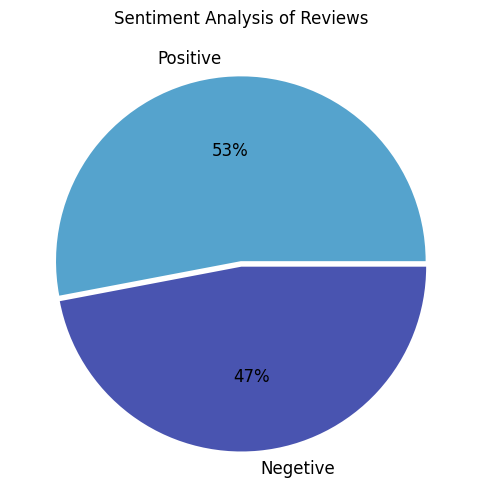

In [ ]:
# Handling Imbalanced Dataset (If needed)
fig = plt.figure(1, figsize=(8,6))
keys = ['Positive','Negetive']
data= zomato_data['Sentiment'].value_counts()
explode = [0.01, 0.02]
palette_color = sns.color_palette('icefire')

plt.pie(data, labels=keys, colors=palette_color, explode=explode, autopct='%.0f%%',textprops={'fontsize': 12})
plt.title('Sentiment Analysis of Reviews')
plt.show()

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

As our most important variable is in the 50:50 ratio. However it is said to be very slightly imbalanced. therefore not applying any technique (over sampling & undersampling). **Leaving it as it is**.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***